# Anticipez les besoins en consommation de bâtiments

# Notebook modelisation

# Les imports

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [117]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
import shap
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import shap
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [119]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# Les données

In [120]:
data = pd.read_csv('p4_data.csv')
pd.set_option('display.max_columns', None)
# lire les données et visualiser toutes les colonnes

In [121]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25
4,Other,DOWNTOWN,1999,2,97288,37198,60090,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,12086616.0,12581712.0,0.00,2.160444e+06,7371434.0,4715182.0,301.81,12086616.00


In [122]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1409 non-null   object 
 1   Neighborhood                     1409 non-null   object 
 2   YearBuilt                        1409 non-null   int64  
 3   NumberofFloors                   1409 non-null   int64  
 4   PropertyGFATotal                 1409 non-null   int64  
 5   PropertyGFAParking               1409 non-null   int64  
 6   PropertyGFABuilding(s)           1409 non-null   int64  
 7   LargestPropertyUseType           1405 non-null   object 
 8   LargestPropertyUseTypeGFA        1405 non-null   float64
 9   SecondLargestPropertyUseType     722 non-null    object 
 10  SecondLargestPropertyUseTypeGFA  722 non-null    float64
 11  ThirdLargestPropertyUseType      235 non-null    object 
 12  ThirdLargestProperty

In [123]:
data.shape

(1409, 24)

In [124]:
data.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
count,1409.000000,1409.000000,1.409000e+03,1409.000000,1.409000e+03,1.405000e+03,722.000000,235.000000,922.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1409.000000,1.409000e+03
mean,1960.995742,3.980128,1.022657e+05,12345.584102,8.992011e+04,8.313371e+04,29462.316201,12403.178723,63.052061,74.077573,76.995316,7.085225e+06,7.260141e+06,4.916473e+05,1.452456e+06,4.955779e+06,1.616610e+06,158.356182,7.064036e+06
std,32.720558,6.175778,1.718397e+05,41327.109910,1.506633e+05,1.404702e+05,54170.241099,27978.482421,28.951183,75.979208,76.832367,1.852093e+07,1.869895e+07,5.507290e+06,3.731642e+06,1.273236e+07,5.439627e+06,581.475138,1.850187e+07
min,1900.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,1.400000,1.500000,5.713320e+04,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.400000,5.713300e+04
25%,1929.000000,1.000000,2.838500e+04,0.000000,2.752600e+04,2.460000e+04,4815.000000,2613.500000,43.000000,34.099998,36.599998,1.208029e+06,1.286817e+06,0.000000e+00,2.080864e+05,7.099910e+05,0.000000e+00,19.770000,1.208029e+06
50%,1965.000000,2.000000,4.596000e+04,0.000000,4.441600e+04,4.076800e+04,10423.500000,5471.000000,70.000000,53.099998,55.900002,2.485521e+06,2.652254e+06,0.000000e+00,4.604637e+05,1.571102e+06,4.598420e+05,47.080000,2.491238e+06
75%,1988.000000,4.000000,9.772000e+04,0.000000,8.843400e+04,8.348500e+04,27093.750000,10617.500000,88.000000,83.599998,87.300003,6.461937e+06,6.669622e+06,0.000000e+00,1.333497e+06,4.549891e+06,1.408968e+06,130.320000,6.461936e+06
max,2015.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,441551.000000,303910.000000,100.000000,834.400024,834.400024,2.930908e+08,2.966717e+08,1.349435e+08,8.046087e+07,2.745325e+08,1.381912e+08,12307.160000,2.930908e+08


# Les Modeles

# selectionner les données pour le model

## Les features

In [125]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood']]

In [126]:
features.describe()

,PropertyGFAParking,PropertyGFABuilding(s),NumberofFloors,YearBuilt
count,1409.000000,1.409000e+03,1409.000000,1409.000000
mean,12345.584102,8.992011e+04,3.980128,1960.995742
std,41327.109910,1.506633e+05,6.175778,32.720558
min,0.000000,3.636000e+03,0.000000,1900.000000
25%,0.000000,2.752600e+04,1.000000,1929.000000
50%,0.000000,4.441600e+04,2.000000,1965.000000
75%,0.000000,8.843400e+04,4.000000,1988.000000
max,512608.000000,1.765970e+06,99.000000,2015.000000


## Regarder les valeurs nulles

In [127]:
features.isna().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
dtype: int64

## Target 

In [128]:
target = data[['TotalGHGEmissions']]

In [129]:
target.describe()

,TotalGHGEmissions
count,1409.000000
mean,158.356182
std,581.475138
min,0.400000
25%,19.770000
50%,47.080000
75%,130.320000
max,12307.160000


### Correlation entre les features et la target

<AxesSubplot:>

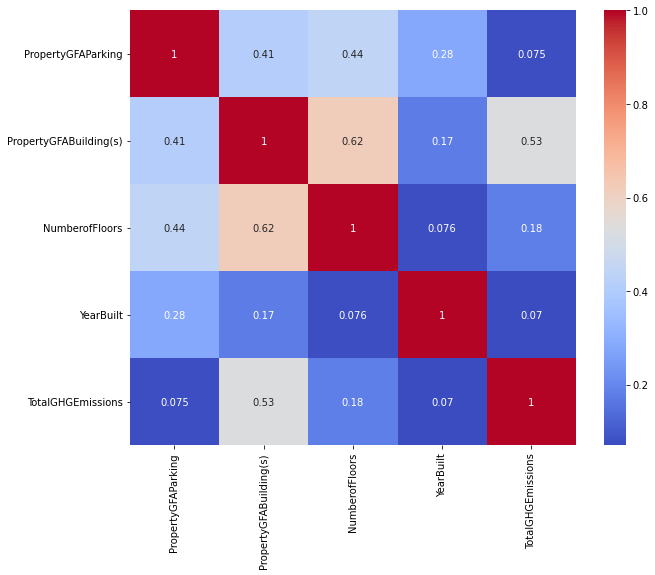

In [130]:
# Calculer la matrice de corrélation
correlation_matrix =  data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','TotalGHGEmissions']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

La variable PropertyGFABuilding(s) est la plus corrélé avec la target

In [131]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PropertyGFAParking      1409 non-null   int64 
 1   PropertyGFABuilding(s)  1409 non-null   int64 
 2   PrimaryPropertyType     1409 non-null   object
 3   NumberofFloors          1409 non-null   int64 
 4   YearBuilt               1409 non-null   int64 
 5   Neighborhood            1409 non-null   object
dtypes: int64(4), object(2)
memory usage: 66.2+ KB



# Fonctions pour visualiser les resultats

In [132]:
#fonction pour tracer les graphiques de comparaison entre les valeurs réelles et prédites total energy


def plot_comparison_co2(y_test, y_pred):

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, label='Réel', marker='o', color='blue')
    plt.scatter(y_pred, y_pred, label='Prédiction', marker='x', color='red')

    plt.legend()
    plt.title("Comparaison des valeurs réelles et prédites pour le TotalGHGEmissions ")
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.show()

# Fonction pretraitement et fit du model

In [133]:
def preprocess_and_train_model(features, target, model, columns_to_normalize,columns_to_encode,test_size=0.2, random_state=42):

     #Créer les transformateurs pour la normalisation et l'encodage
    transformateurs =ColumnTransformer ([
    ('normalisation', StandardScaler(), columns_to_normalize),
    ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
])
    # Créer la pipeline avec le préprocesseur et le modèle
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])

  
    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state, 
                                                        stratify=pd.qcut(target.squeeze(), 4))
    # le stratify est basée sur la découpe de la (target) en 4 quantiles égaux

    pipeline.fit(X_train, y_train)

   # Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test
    predictions_train = pipeline.predict(X_train)
    predictions_test = pipeline.predict(X_test)
    
    # Calculer les métriques pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, predictions_train)
    r2_train = r2_score(y_train, predictions_train)
    
    # Calculer les métriques pour l'ensemble de test
    mse_test = mean_squared_error(y_test, predictions_test)
    r2_test = r2_score(y_test, predictions_test)
    
    # Afficher les métriques pour l'ensemble d'entraînement
    print("Train Mean Squared Error:", mse_train)
    print("Train R-squared:", r2_train)
    
    # Afficher les métriques pour l'ensemble de test
    print("Test Mean Squared Error:", mse_test)
    print("Test R-squared:", r2_test)
    
    # Appeler la fonction pour afficher la comparaison entre les valeurs réelles et prédites pour l'ensemble de test
    plot_comparison_co2(y_test, predictions_test)
    
    return pipeline



# Un model naif(Dummy regressor )

In [134]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [135]:
model = DummyRegressor(strategy='mean')

Train Mean Squared Error: 118441.32242563031
Train R-squared: 0.0
Test Mean Squared Error: 1216479.0528809144
Test R-squared: -0.00684672800323094


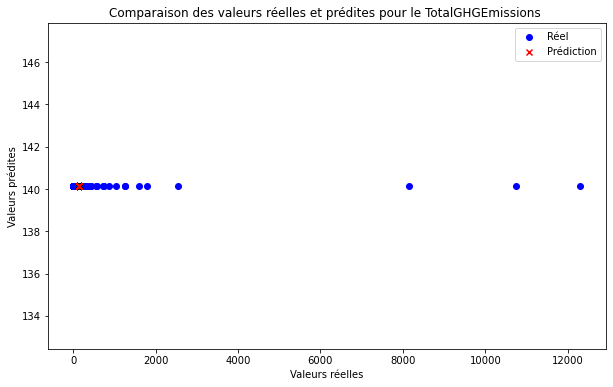

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', DummyRegressor())])

In [136]:
preprocess_and_train_model(features, target, model,columns_to_normalize,columns_to_encode ,test_size=0.2, random_state=42)

# Regression lineaire

In [137]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

Train Mean Squared Error: 45378.82432520119
Train R-squared: 0.6168666188804612
Test Mean Squared Error: 496496.5057756342
Test R-squared: 0.5890633043607607


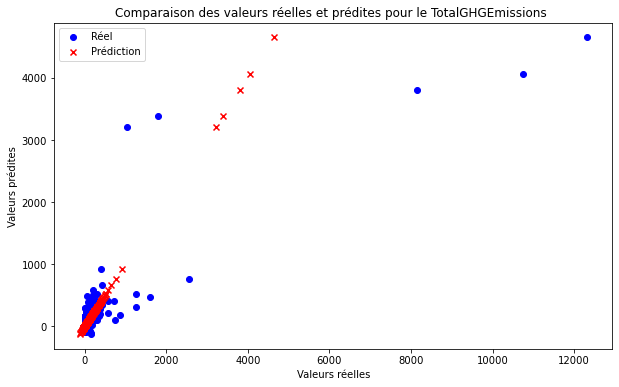

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', LinearRegression())])

In [138]:
preprocess_and_train_model(features, target, LinearRegression(),columns_to_normalize,columns_to_encode ,test_size=0.2, random_state=42)

Le modele de regressio lineaire fait de l'overfitting mais un bon resultat sur le train

# Fonction de traitement et d'entrainement avec grid search

In [139]:

def preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42):
    transformateurs = ColumnTransformer([
        ('normalisation', StandardScaler(), columns_to_normalize),
        ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
    ])
    
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])
    
    
    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state, 
                                                        stratify=pd.qcut(target.squeeze(), 4))
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    result = grid_search.cv_results_
    #best_index = np.flatnonzero(result['rank_test_score'] == 1)[0]
    # afficher les metrique et le temps d'entrainement
    best_index = np.argmax(result['mean_test_score'])
    print('cv R-squared',result['mean_test_score'][best_index])
    print('mean_score_time', result['mean_score_time'][best_index])
    print('mean_fit_time', result['mean_fit_time'][best_index])
    #print(result)
    best_pipeline = grid_search.best_estimator_
    
    predictions = best_pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    
    plot_comparison_co2(y_test, predictions)
    
    return best_pipeline


# .Decision tree regressor avec le log de la  target

Nous allons utilisé le log sur la target est fortement asymétrique car  La transformation logarithmique peut diminuer l'effet   des valeurs aberrantes (outliers).   
Les modèles linéaires peuvent être sensibles aux valeurs aberrantes

In [140]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
)

 nous utilisons np.log1p plutôt que np.log pour éviter les erreurs lorsque les valeurs sont nulles ou négatives.  
La transformation logarithmique est souvent utilisée pour stabiliser les distributions de données qui présentent des valeurs  
très élevées ou très basses, et np.log1p est une alternative efficace à np.log(1 + X) pour cette tâche.

In [141]:
param_grid = {
    'model__regressor__max_depth': [None, 10, 20, 15],  
    'model__regressor__min_samples_split': [2, 5, 7, 10]
}

cv R-squared 0.33519744278271224
mean_score_time 0.015923595428466795
mean_fit_time 0.03126959800720215
Mean Squared Error: 556861.2435737763
R-squared: 0.539101047637231


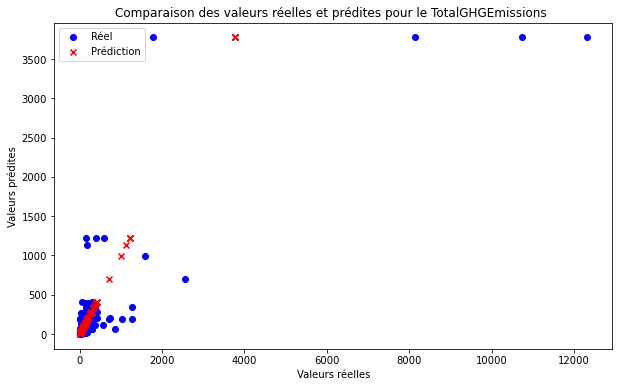

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=DecisionTreeRegressor(max_depth

In [142]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [90]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(max_depth = 20, min_samples_split =10), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 18688.42126212669
Train R-squared: 0.8422136727335072
Test Mean Squared Error: 560074.6245596277
Test R-squared: 0.5364414193240512


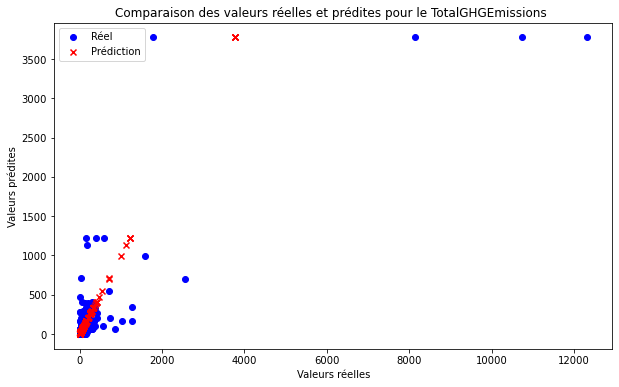

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=DecisionTreeRegressor(max_depth

In [91]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Le modele fait de l'overfitting

# Decision tree regressor sans le log de la target

In [92]:
# defenir le model avec la methode log
model = DecisionTreeRegressor()

In [93]:
param_grid = {
    'model__max_depth': [None, 10, 20, 15],  # Hyperparameter for DecisionTreeRegressor
    'model__min_samples_split': [2,4,7],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared 0.0622818999140546
mean_score_time 0.012034225463867187
mean_fit_time 0.0577883243560791
Mean Squared Error: 434375.6158302305
R-squared: 0.6404790805996149


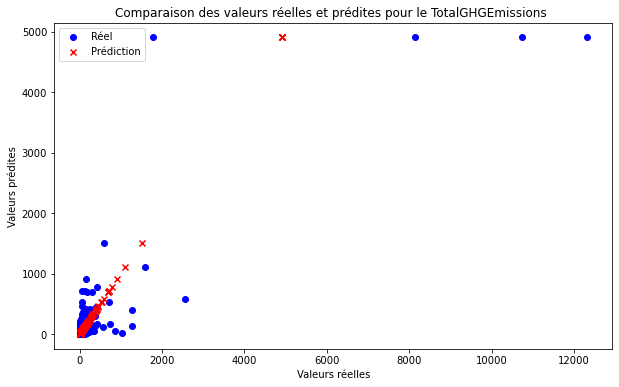

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', DecisionTreeRegressor())])

In [94]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [95]:
# defenir le model avec la methode log
model =DecisionTreeRegressor(max_depth=20, min_samples_split=4)


Train Mean Squared Error: 8080.380693595397
Train R-squared: 0.9317773516192451
Test Mean Squared Error: 438272.629802835
Test R-squared: 0.6372536277995791


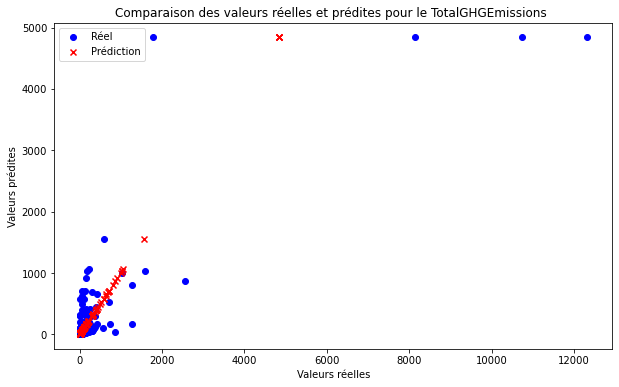

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=20, min_samples_split=4))])

In [96]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Les resultats sont meilleure avec la méthode de log sur la target sur le train , mais ici le modele de l'overfitting

# . Lasso avec le log de la target

Le paramètre alpha dans le modèle Lasso est aussi appelé "paramètre de régularisation". Il contrôle le degré de régularisation : une valeur d'alpha élevée entraîne une régularisation plus forte, ce qui peut pousser davantage de coefficients à être exactement zéro. Inversement, une valeur d'alpha faible réduit la régularisation, ce qui pourrait entraîner un ajustement plus flexible du modèle mais avec un risque accru de surajustement.

In [97]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [101]:
alpha = np.arange(0,10, 0.5)

In [102]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__regressor__alpha': alpha   # Liste des valeurs d'alpha 

}


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.2261142170609, tolerance: 0.1703302558675629
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.9922187639901, tolerance: 0.17572134080638807
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.89660798266584, tolerance: 0.175626417677745
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.64671085035445, tolerance: 0.174699077490618

cv R-squared -0.06300593593563356
mean_score_time 0.011673164367675782
mean_fit_time 0.027755594253540038
Mean Squared Error: 1215399.5937118682
R-squared: -0.005953288917869504


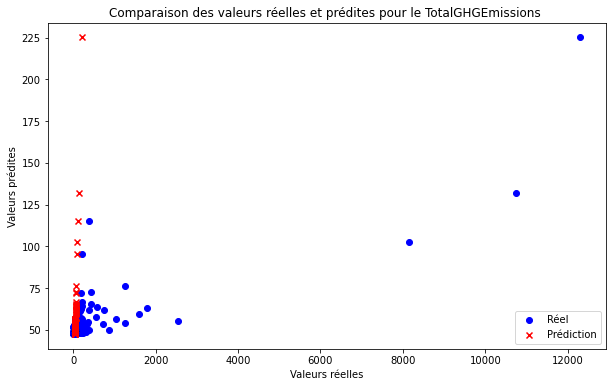

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.5)))])

In [103]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [104]:
model = TransformedTargetRegressor(
    regressor=Lasso(alpha= 0.5), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 123901.7807754935
Train R-squared: -0.04610264591812396
Test Mean Squared Error: 1215399.5937118682
Test R-squared: -0.005953288917869504


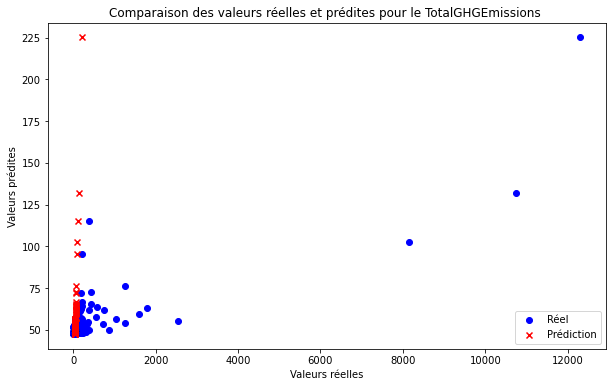

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.5)))])

In [105]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Les resultats ne sont pas trés bon avec notre methode de log sur la target,  et donc nous allons utilisé la target sans un log et comparé les résultats 

# Lasso  sans le Log de la  target

In [106]:
model = Lasso()

In [107]:
alpha


array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [108]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha':alpha   # Liste des valeurs d'alpha 

}


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 20202744.629461017, tolerance: 11852.265369395564
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 16798512.3970692, tolerance: 7288.522582832364
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 17746494.965970546, tolerance: 12542.94455929336
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 21287776.146248322, tolerance: 12341.457178642704


cv R-squared 0.15548630887172604
mean_score_time 0.012744569778442382
mean_fit_time 0.02510075569152832
Mean Squared Error: 792349.9397503419
R-squared: 0.3441934389401393


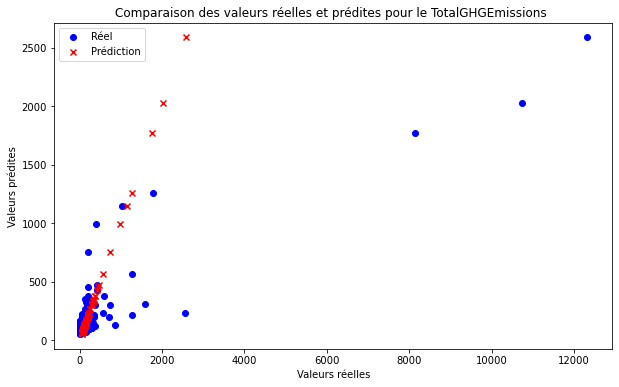

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=9.0))])

In [109]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [110]:
model = Lasso(alpha = 9.0)

Train Mean Squared Error: 75413.63252611851
Train R-squared: 0.36328275485550265
Test Mean Squared Error: 792349.9397503419
Test R-squared: 0.3441934389401393


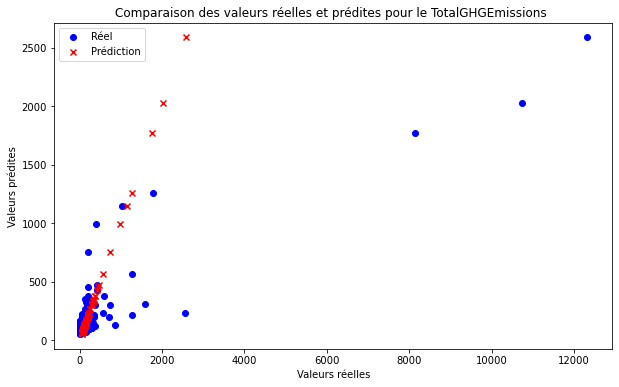

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=9.0))])

In [111]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Nous n'avons pas de meilleure resultats sans le log sur la target sur les données train mais le modele ne fait   
plus de l'overfitting, et donc le modele Lasso ne fonctionne pas trés bien en appliquant le log sur la target

# . Ridge sans le Log sur la target

In [112]:
param_grid={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.21247333800832022
mean_score_time 0.01302928924560547
mean_fit_time 0.023789691925048827
Mean Squared Error: 729971.4748955377
R-squared: 0.39582240294752236


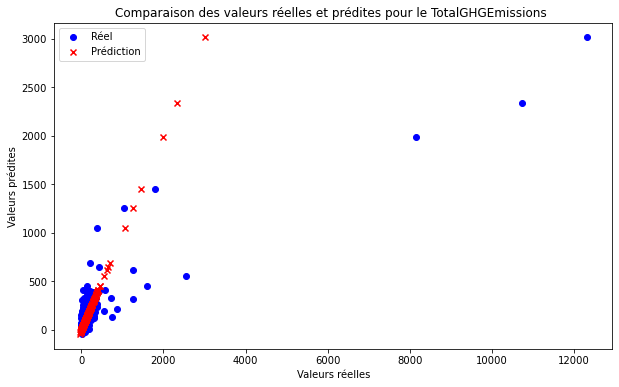

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Ridge(alpha=9.5))])

In [113]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [114]:
model = Ridge(alpha=9.5)

Train Mean Squared Error: 61998.316787610565
Train R-squared: 0.4765482559810196
Test Mean Squared Error: 729971.4748955377
Test R-squared: 0.39582240294752236


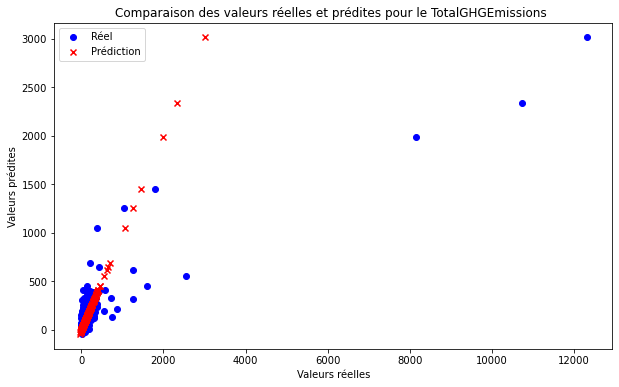

In [115]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Ce modele fait de meilleure , mais ca reste trés faible

# Observer les valeurs max mal predites

In [143]:
def find_max_ten_error_values_two(features, target, pipeline):
    # faire la prediction 
    predictions = pipeline.predict(features)
    
    # Reshape la predictions si c'est 2D avec 1 dimmension
    if predictions.ndim == 2 and 1 in predictions.shape:
        predictions = predictions.reshape(-1)
    
    # Convertir la  predictions en  pandas 
    predictions_series = pd.Series(predictions, index=target.index)
    
    # si la target est un DataFrame avec une colonne, convertir en Series
    if isinstance(target, pd.DataFrame) and target.shape[1] == 1:
        target = target.squeeze()
    
    # Calculer les erreurs
    errors = abs(predictions_series - target)
    
    # Find the indices of the top 10 largest errors
    max_error_indices = np.argsort(errors)[-10:][::-1]
    
    # Get the feature values corresponding to the largest errors
    max_error_feature_values = features.iloc[max_error_indices]
    
    # Display the feature values with the largest errors
    print("Max Error Feature Values:")
    return max_error_feature_values

In [89]:
find_max_ten_error_values_two(features, target,trained_pipeline)

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use
484,0,1765970,Hospital,14,1994,EAST,0.477874,0.059380,0.462746
113,0,1158691,Hospital,8,2000,EAST,0.575534,0.006251,0.418215
92,0,879000,Hospital,10,1953,NORTHEAST,0.455581,0.544419,0.000000
1371,0,374466,Hospital,8,1920,EAST,0.549330,0.000000,0.450670
111,0,597519,Hospital,5,1990,CENTRAL,0.409662,0.590338,0.000000
1162,0,54863,Hospital,3,1961,SOUTHWEST,1.000000,0.000000,0.000000
87,68432,230638,Other,11,2004,DOWNTOWN,0.469132,0.530868,0.000000
1338,0,178000,Laboratory,8,2000,EAST,0.416354,0.000000,0.583646
433,0,429405,Other,33,1981,DOWNTOWN,0.999455,0.000545,0.000000
253,150455,201075,Hospital,7,2000,LAKE UNION,0.627069,0.372931,0.000000


Le modele a du mal a prédire la catégorie hopital et les pro^priété sans parking

# Ridge avec le log de target

In [90]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)
param={'model__regressor__alpha': alpha}


cv R-squared -30.997964506262964
mean_score_time 0.015031385421752929
mean_fit_time 0.03674836158752441
Mean Squared Error: 3036423575.8946195
R-squared: -2512.1654630477633


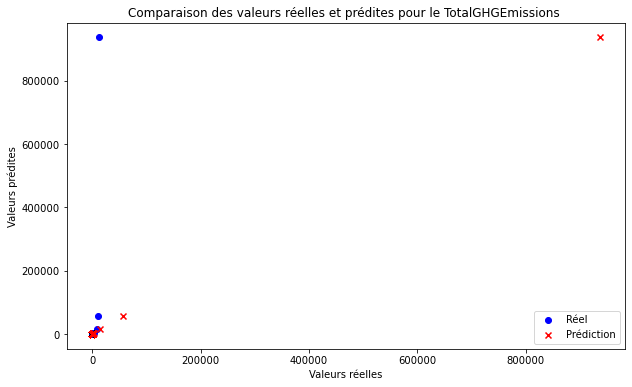

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [91]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure modele

In [92]:
model = TransformedTargetRegressor(
    regressor = Ridge(alpha=9.9), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 511076.3079918597
Train R-squared: -3.315016900564971
Test Mean Squared Error: 214166858.90142393
Test R-squared: -176.26010211269738


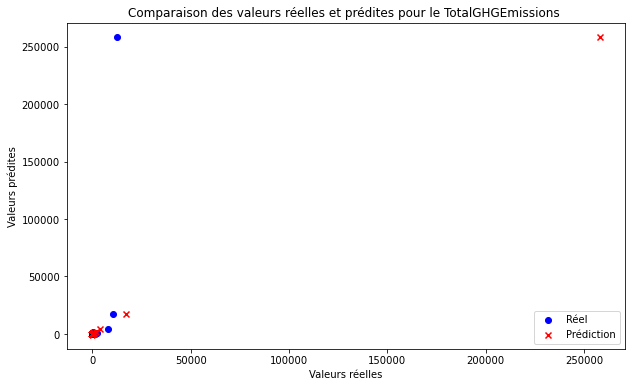

In [93]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

#   Random forest regressor sans la methode log de la taget

Definition des paramètres utilisés;  
**estimator__n_estimators** : C'est le nombre d'arbres dans un modèle de type RandomForest, où chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement. Un nombre plus élevé d'arbres peut généralement conduire à de meilleures performances, mais cela augmente également le temps de calcul.

**estimator__max_depth** : C'est la profondeur maximale de chaque arbre dans le modèle RandomForest. Une profondeur plus élevée peut permettre au modèle d'apprendre des relations plus complexes dans les données, mais cela peut également le rendre plus susceptible de surapprendre (overfitting) aux données d'entraînement.

**estimator__min_samples_split** : C'est le nombre minimum d'échantillons requis pour diviser un nœud interne dans l'arbre RandomForest. Ce paramètre contrôle la taille minimale d'un groupe d'échantillons qui peut être divisé en sous-groupes plus petits.

**estimator__min_samples_leaf** : C'est le nombre minimum d'échantillons requis pour être à une feuille de l'arbre RandomForest. Ce paramètre contrôle la taille minimale des feuilles de l'arbre, empêchant ainsi la création de feuilles avec très peu d'échantillons.

In [47]:
model = RandomForestRegressor(verbose=0)


In [48]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50,100,200],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

cv R-squared 0.39202968298904856
mean_score_time 0.01563868522644043
mean_fit_time 0.1303933620452881
Mean Squared Error: 503665.4559694754
R-squared: 0.5831297586669051


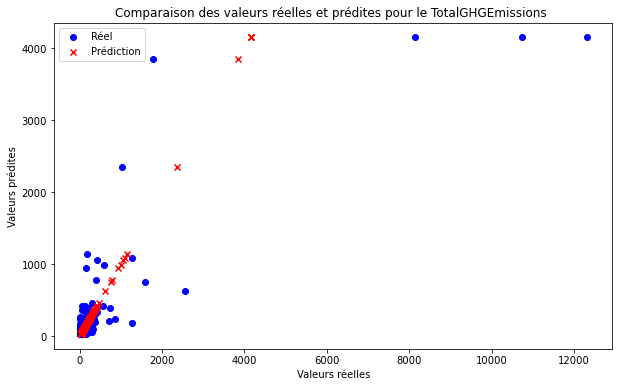

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       n_estimators=10))])

In [49]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [50]:
model = RandomForestRegressor(min_samples_leaf=4,max_depth=20,
                                       n_estimators=10)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train Mean Squared Error: 33474.53316410425
Train R-squared: 0.717374540586348
Test Mean Squared Error: 759218.1048552436
Test R-squared: 0.3716157603338959


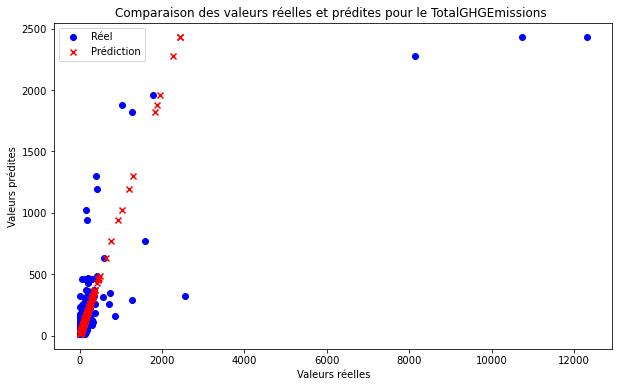

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=4,
                                       n_estimators=10))])

In [51]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

#  Random forest regressor avec la methode log de la taget

In [52]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [53]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10, 50],
    'model__regressor__max_depth': [None, 10,20,30],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 3,6]
}


cv R-squared 0.47803720293798974
mean_score_time 0.018970298767089843
mean_fit_time 0.19560608863830567
Mean Squared Error: 668691.4133343775
R-squared: 0.44654224833127243


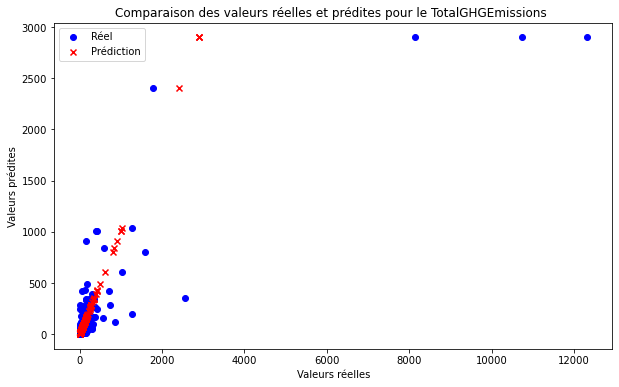

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RandomForestRegressor(max_depth

In [54]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleur modele

In [55]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(max_depth=10,n_estimators=10), func=np.log1p, inverse_func=np.expm1)

Train Mean Squared Error: 28421.46696217606
Train R-squared: 0.7600375748926479
Test Mean Squared Error: 766158.107611728
Test R-squared: 0.3658717082261743


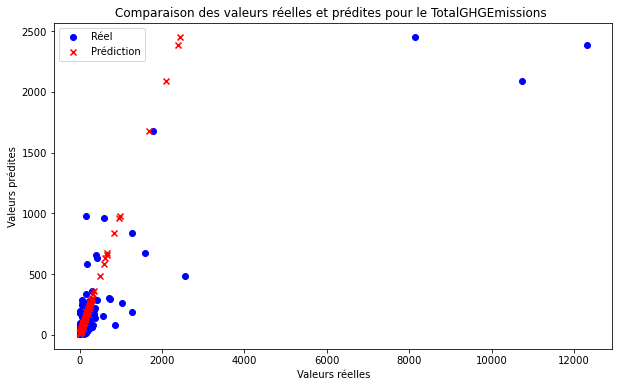

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RandomForestRegressor(max_depth

In [56]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

avec les deux methode le modele fait de l'overfitting

# Features ENGINEERING 

## Créer de nouvelle variables

In [144]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25
4,Other,DOWNTOWN,1999,2,97288,37198,60090,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,12086616.0,12581712.0,0.00,2.160444e+06,7371434.0,4715182.0,301.81,12086616.00


Calculer le pourcentage d'energie consommé par batiment  
Nous allons utilisé le tolal sans le WN puisque l'energie consommé( elec, steam et gaz n'a pas de WN ) que nous avons    
calculé   en additionnant les 3 energies

### Pourcentage de consommation d'énergie

In [145]:
data['perc-elec_use'] = data['Electricity(kBtu)']/ data['steam_elec_gaz']

In [146]:
data['perc-gaz_use'] = data['NaturalGas(kBtu)']/ data['steam_elec_gaz']

In [147]:
data['perc-steam_use'] = data['SteamUse(kBtu)']/ data['steam_elec_gaz']

In [148]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00,0.546060,0.176638,0.277302
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00,0.386609,0.613391,0.000000
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00,0.682307,0.020579,0.297113
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25,0.407519,0.266567,0.325913
4,Other,DOWNTOWN,1999,2,97288,37198,60090,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,12086616.0,12581712.0,0.00,2.160444e+06,7371434.0,4715182.0,301.81,12086616.00,0.609884,0.390116,0.000000


In [149]:
data.shape

(1409, 27)

## observer les batiments qui ne consomment rien

In [150]:
colonnes = ['TotalGHGEmissions','SiteEnergyUse(kBtu)','steam_elec_gaz','SiteEUIWN(kBtu/sf)']

In [151]:
# Créer un masque booléen pour les lignes où les colonnes ciblées sont égales à zéro
masque = (data[colonnes] <= 0).all(axis=1)

In [152]:
masque.value_counts()

False    1409
dtype: int64

## selectionner les features

In [153]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use']]

### Correlation entre les features et la target

<AxesSubplot:>

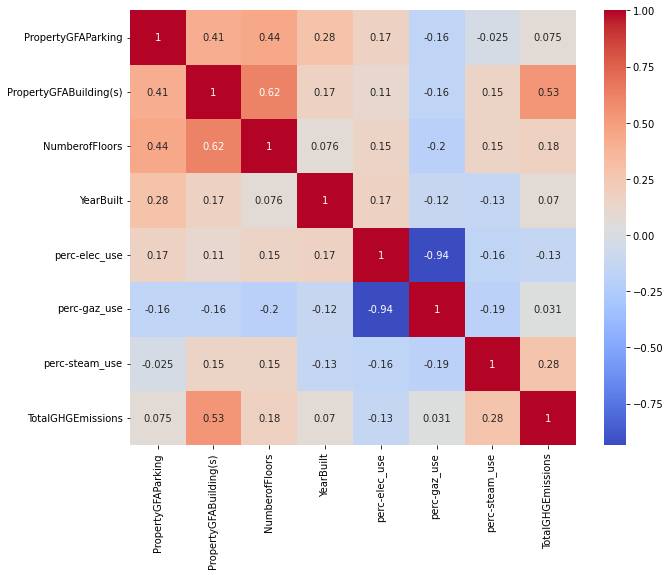

In [154]:
# Calculer la matrice de corrélation
correlation_matrix =  data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use',
                                'TotalGHGEmissions']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Regarder les valeurs nulles

In [36]:
features.isnull().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
perc-elec_use             0
perc-gaz_use              0
perc-steam_use            0
dtype: int64

In [37]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PropertyGFAParking      1409 non-null   int64  
 1   PropertyGFABuilding(s)  1409 non-null   int64  
 2   PrimaryPropertyType     1409 non-null   object 
 3   NumberofFloors          1409 non-null   int64  
 4   YearBuilt               1409 non-null   int64  
 5   Neighborhood            1409 non-null   object 
 6   perc-elec_use           1409 non-null   float64
 7   perc-gaz_use            1409 non-null   float64
 8   perc-steam_use          1409 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 99.2+ KB


In [38]:
features.shape

(1409, 9)

## Target 

In [155]:
target = data[['TotalGHGEmissions']]

In [156]:
target.isnull().sum()

TotalGHGEmissions    0
dtype: int64

# Les Modeles 

In [157]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors','perc-elec_use','perc-gaz_use','perc-steam_use']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

# . Lasso Grid search avec le log de la target

In [74]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [75]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__regressor__alpha':  alpha  # Liste des valeurs d'alpha 

}


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.28882351305234, tolerance: 0.1703302558675629
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.26808389559105, tolerance: 0.17572134080638807
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 240.26162087154333, tolerance: 0.175626417677745
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.90374439266986, tolerance: 0.1746990774906

cv R-squared 0.009621620220983961
mean_score_time 0.015520668029785157
mean_fit_time 0.029511547088623045
Mean Squared Error: 1090315.8855138298
R-squared: 0.09757510479137643


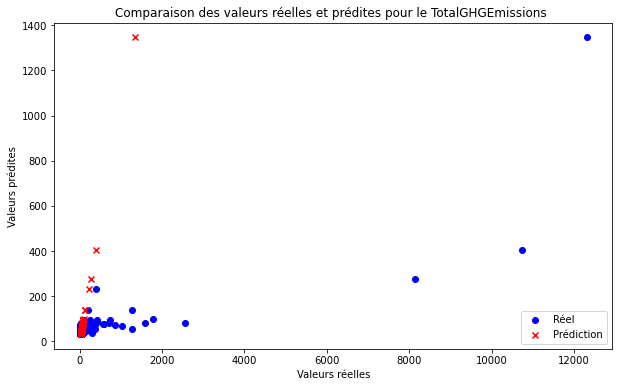

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [76]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [77]:
model = TransformedTargetRegressor(
    regressor=Lasso(alpha= 0.4), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 117473.20488106733
Train R-squared: 0.00817381573201259
Test Mean Squared Error: 1090315.8855138298
Test R-squared: 0.09757510479137643


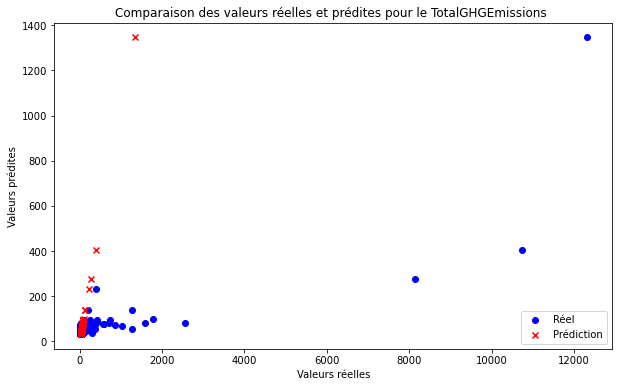

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [78]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Les resultats sont tres mauvais avec le log 

# Lasso Grid search & sans le log de la target

In [79]:
model =Lasso()


In [80]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha': alpha  # Liste des valeurs d'alpha 

}


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 17316189.65044153, tolerance: 11852.265369395564
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 15043993.369520359, tolerance: 7288.522582832364
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 15428899.808042388, tolerance: 12542.94455929336
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 18811728.580659885, tolerance: 12341.457178642704

cv R-squared 0.23738182688269466
mean_score_time 0.01253366470336914
mean_fit_time 0.0282289981842041
Mean Squared Error: 794268.4877975956
R-squared: 0.3426055087416542


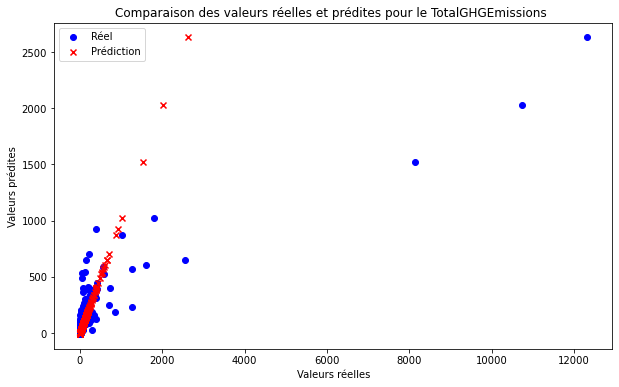

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=9.9))])

In [81]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [82]:
model = Lasso(alpha=1.1)

Train Mean Squared Error: 43363.04140238658
Train R-squared: 0.6338858726470706
Test Mean Squared Error: 502138.611999835
Test R-squared: 0.58439348602116


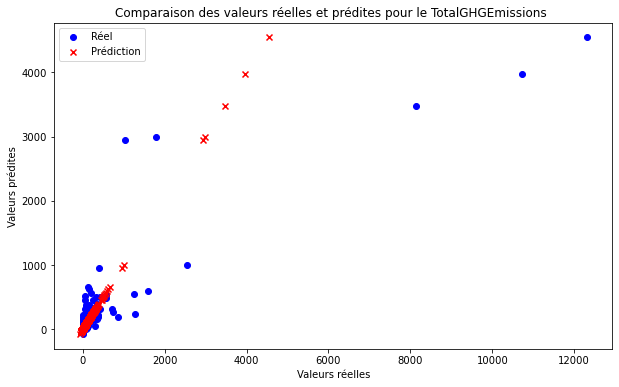

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=1.1))])

In [83]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

On observe que:  
les resultat sont mieux sans le log de la target  
Les nouvelles variables de pourcentage ont aussi améliorer le model mais le modele ne fait plus de l'overfitting
L'ajout de la variable energy star score a bien améliorer les résulats

# . Ridge sans le Log sur la target

In [84]:
param_grid={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.28280245945911264
mean_score_time 0.011378049850463867
mean_fit_time 0.02661099433898926
Mean Squared Error: 699442.4625386212
R-squared: 0.4210904387003259


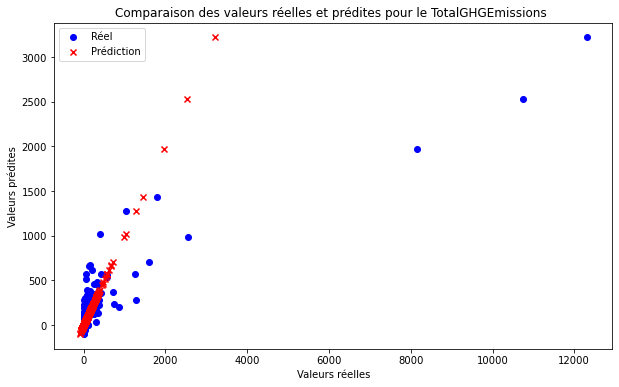

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Ridge(alpha=9.9))])

In [85]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [86]:
model = Ridge(alpha=1.8)

Train Mean Squared Error: 42628.78988756286
Train R-squared: 0.6400851576583029
Test Mean Squared Error: 549007.7995063664
Test R-squared: 0.5456011303506176


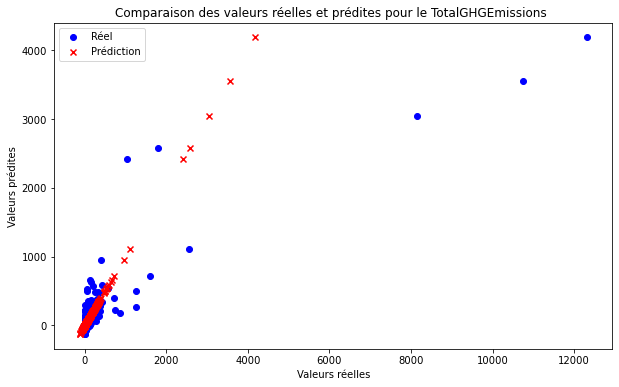

In [87]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Ce modele fait de trés bon resulat sans overfitting et nous avons de meilleure resultats dans le teste comparé au train

# Observer les valeurs max mal predites

In [158]:
def find_max_ten_error_values_two(features, target, pipeline):
    # faire la prediction 
    predictions = pipeline.predict(features)
    
    # Reshape la predictions si c'est 2D avec 1 dimmension
    if predictions.ndim == 2 and 1 in predictions.shape:
        predictions = predictions.reshape(-1)
    
    # Convertir la  predictions en  pandas 
    predictions_series = pd.Series(predictions, index=target.index)
    
    # si la target est un DataFrame avec une colonne, convertir en Series
    if isinstance(target, pd.DataFrame) and target.shape[1] == 1:
        target = target.squeeze()
    
    # Calculer les erreurs
    errors = abs(predictions_series - target)
    
    # Find the indices of the top 10 largest errors
    max_error_indices = np.argsort(errors)[-10:][::-1]
    
    # Get the feature values corresponding to the largest errors
    max_error_feature_values = features.iloc[max_error_indices]
    
    # Display the feature values with the largest errors
    print("Max Error Feature Values:")
    return max_error_feature_values

In [89]:
find_max_ten_error_values_two(features, target,trained_pipeline)

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use
484,0,1765970,Hospital,14,1994,EAST,0.477874,0.059380,0.462746
113,0,1158691,Hospital,8,2000,EAST,0.575534,0.006251,0.418215
92,0,879000,Hospital,10,1953,NORTHEAST,0.455581,0.544419,0.000000
1371,0,374466,Hospital,8,1920,EAST,0.549330,0.000000,0.450670
111,0,597519,Hospital,5,1990,CENTRAL,0.409662,0.590338,0.000000
1162,0,54863,Hospital,3,1961,SOUTHWEST,1.000000,0.000000,0.000000
87,68432,230638,Other,11,2004,DOWNTOWN,0.469132,0.530868,0.000000
1338,0,178000,Laboratory,8,2000,EAST,0.416354,0.000000,0.583646
433,0,429405,Other,33,1981,DOWNTOWN,0.999455,0.000545,0.000000
253,150455,201075,Hospital,7,2000,LAKE UNION,0.627069,0.372931,0.000000


Le modele a du mal a prédire la catégorie hopital et les pro^priété sans parking

# Ridge avec le log de target

In [90]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)
param={'model__regressor__alpha': alpha}


cv R-squared -30.997964506262964
mean_score_time 0.015031385421752929
mean_fit_time 0.03674836158752441
Mean Squared Error: 3036423575.8946195
R-squared: -2512.1654630477633


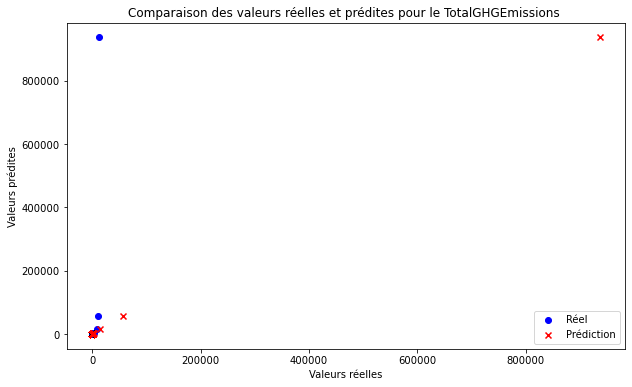

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [91]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure modele

In [92]:
model = TransformedTargetRegressor(
    regressor = Ridge(alpha=9.9), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 511076.3079918597
Train R-squared: -3.315016900564971
Test Mean Squared Error: 214166858.90142393
Test R-squared: -176.26010211269738


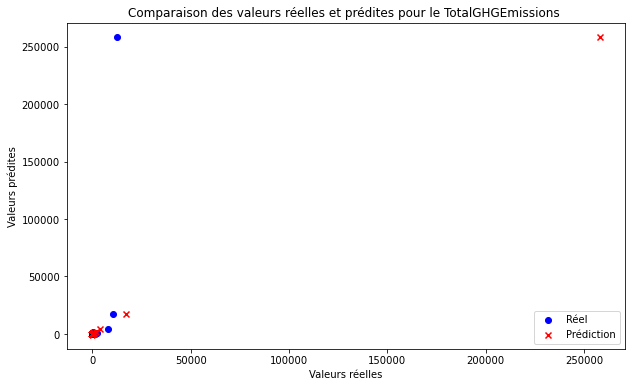

In [93]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Le model Ridge ne fonctionne pas avec la methode log sur la target CO2

# . Random forest regressor sans la methode log de la taget

Definition des paramètres utilisés;  
**estimator__n_estimators** : C'est le nombre d'arbres dans un modèle de type RandomForest, où chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement. Un nombre plus élevé d'arbres peut généralement conduire à de meilleures performances, mais cela augmente également le temps de calcul.

**estimator__max_depth** : C'est la profondeur maximale de chaque arbre dans le modèle RandomForest. Une profondeur plus élevée peut permettre au modèle d'apprendre des relations plus complexes dans les données, mais cela peut également le rendre plus susceptible de surapprendre (overfitting) aux données d'entraînement.

**estimator__min_samples_split** : C'est le nombre minimum d'échantillons requis pour diviser un nœud interne dans l'arbre RandomForest. Ce paramètre contrôle la taille minimale d'un groupe d'échantillons qui peut être divisé en sous-groupes plus petits.

**estimator__min_samples_leaf** : C'est le nombre minimum d'échantillons requis pour être à une feuille de l'arbre RandomForest. Ce paramètre contrôle la taille minimale des feuilles de l'arbre, empêchant ainsi la création de feuilles avec très peu d'échantillons.

In [94]:
model = RandomForestRegressor(verbose=1)


In [95]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50,100],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Ple

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed

cv R-squared 0.4772994494935423
mean_score_time 0.031173324584960936
mean_fit_time 0.9338445663452148
Mean Squared Error: 747316.4498097964
R-squared: 0.38146643750910303


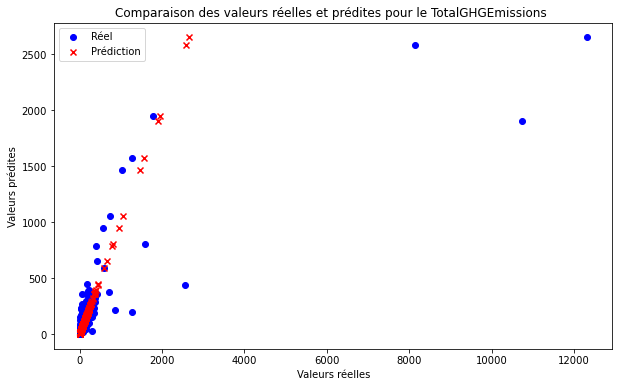

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Rand

In [96]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [183]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=4,
                                       n_estimators=50)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train Mean Squared Error: 72586.06474598622
Train R-squared: 0.5017628910113637
Test Mean Squared Error: 676072.3789271876
Test R-squared: 0.2913139251040737


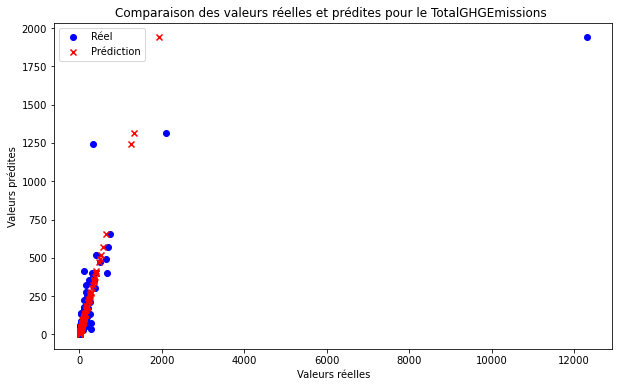

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore',
                                                   'Supermarket/Grocery '
                                                   'Store_GFA',
                                                   'Other - Education_GFA',
                                                   'Food Service_GFA',
                                                   'Bank

In [184]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

#  Random forest regressor avec la methode log de la taget

In [99]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [100]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10, 50,100],
    'model__regressor__max_depth': [None, 10,20,30],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 3,6]
}


cv R-squared 0.5750378170223984
mean_score_time 0.019933319091796874
mean_fit_time 0.32915096282958983
Mean Squared Error: 486883.20243504696
R-squared: 0.5970199748770759


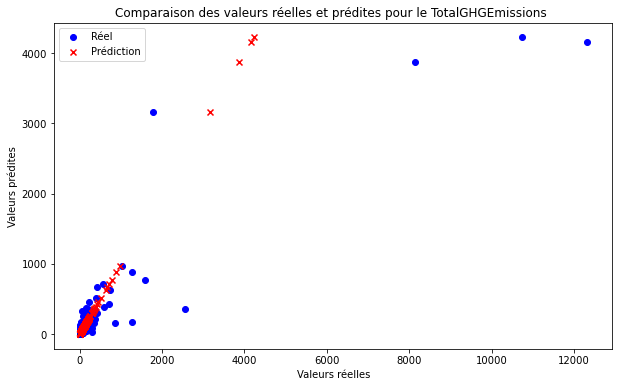

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [101]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [102]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(max_depth=30,min_samples_leaf=2,n_estimators=10), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 26100.170735390057
Train R-squared: 0.7796362772648167
Test Mean Squared Error: 658722.9591314393
Test R-squared: 0.45479286758666293


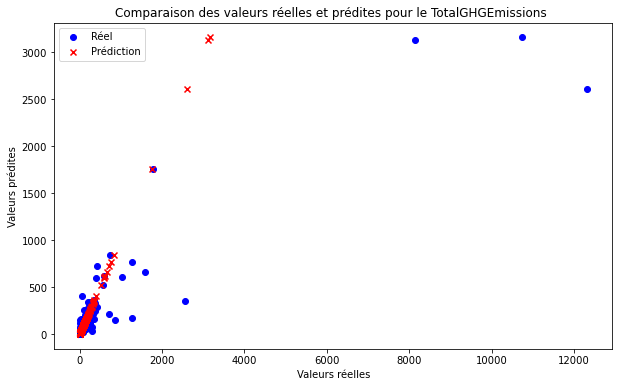

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 Tran

In [103]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Nous observons  que certain modele ont un evenement commun qui est **L'overfitting** peut etre pour plusieurs raisons:  
.ne pas avoir suffisamment de données pour entraîner votre modèle, il est plus susceptible d'overfitter. Plus de données peuvent aider le modèle à généraliser mieux.  
Puisque les techniques de régularisation, comme la régularisation L1 (Lasso) ou L2 (Ridge), peuvent aider à prévenir l'overfitting en pénalisant les poids élevés dans les modèles linéaires ou les arbres de décision profonds dans le cas des forêts aléatoires.
Pour la suite des modeles testés nous n'allons plus utilisé la methode log de la target avec les Modeles Ridge et Lasso

# Ajouter la colonne ENERGYSTARScore

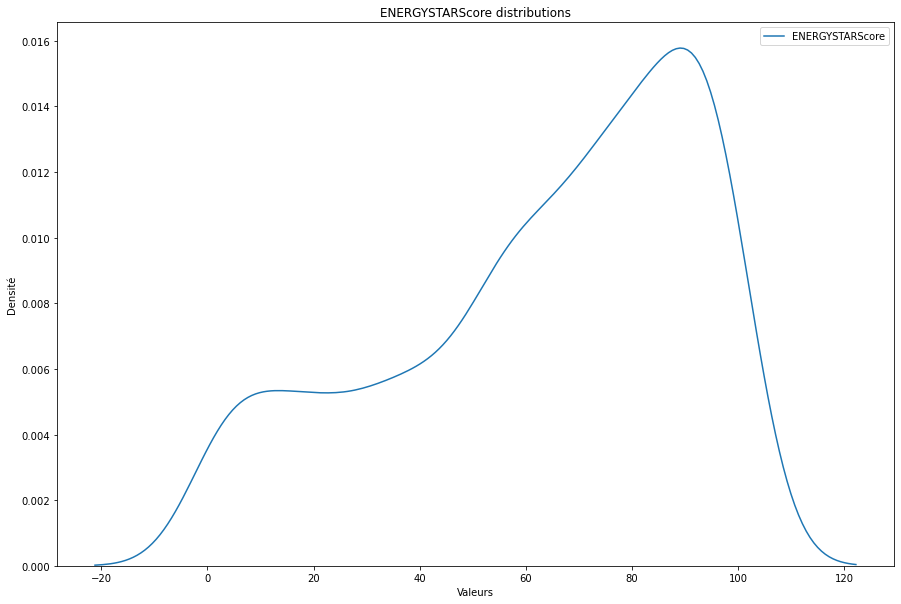

In [376]:
plt.figure(figsize = (15,10))

sns.kdeplot(data['ENERGYSTARScore'],  label='ENERGYSTARScore')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('ENERGYSTARScore distributions')
plt.legend()
plt.show()

Text(0.5, 1.0, 'representation de ENERGYSTAR Score')

<Figure size 1008x576 with 0 Axes>

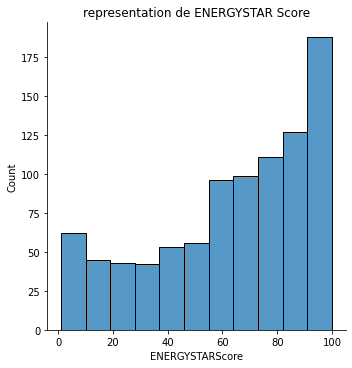

In [377]:
plt.figure(figsize= (14,8))
sns.displot(data["ENERGYSTARScore"])
plt.title('representation de ENERGYSTAR Score')

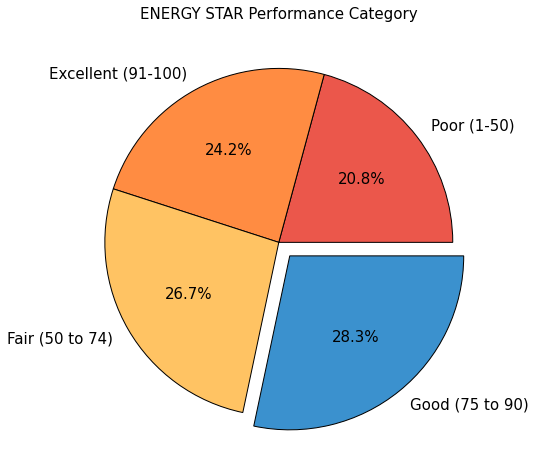

In [378]:
energy = pd.cut(data['ENERGYSTARScore'], [1, 50, 74, 90, 100])  
count = energy.value_counts().sort_values()
category = ['Poor (1-50)', 'Excellent (91-100)', 'Fair (50 to 74)', 'Good (75 to 90)']

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(count, 
       labels=category,
       explode = [0, 0, 0, .1],
       autopct='%1.1f%%',
       colors = ["#eb574b", "#ff8c42", "#ffc363", "#3b91ce"],
       wedgeprops = {"ec": "k"}, 
       textprops = {"fontsize": 15}) 
ax.set_title('ENERGY STAR Performance Category', {"fontsize": 15})
#plt.savefig('p4_00_graphic/ENERGYSTARScore_category.png')
plt.show()

nous avons un équilibre dans la présence de bâtiment selon leurs energy star

## observer les variables  vs  energy score 

In [43]:
data['ENERGYSTARScore'].describe()

count    922.000000
mean      63.052061
std       28.951183
min        1.000000
25%       43.000000
50%       70.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

Text(0.5, 1.0, 'CO2 vs elec use')

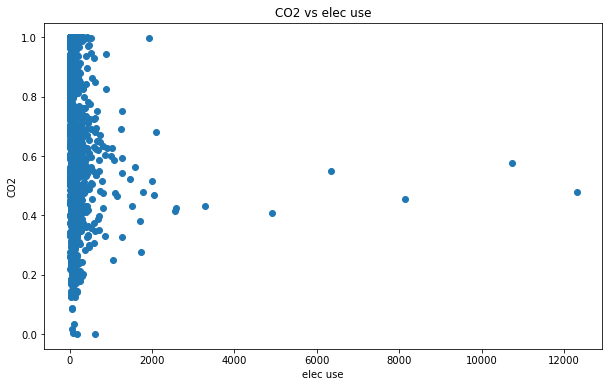

In [380]:
plt.figure(figsize = (10,6))
plt.scatter(data['TotalGHGEmissions'], data['perc-elec_use'])
plt.xlabel('elec use')
plt.ylabel('CO2')
plt.title('CO2 vs elec use')

Text(0.5, 1.0, 'CO2 vs gaz use')

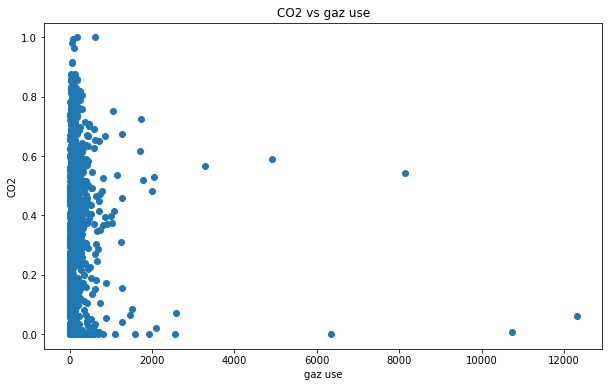

In [381]:
plt.figure(figsize = (10,6))
plt.scatter(data['TotalGHGEmissions'], data['perc-gaz_use'])
plt.xlabel('gaz use')
plt.ylabel('CO2')
plt.title('CO2 vs gaz use')

Text(0.5, 1.0, 'CO2 vs steam use')

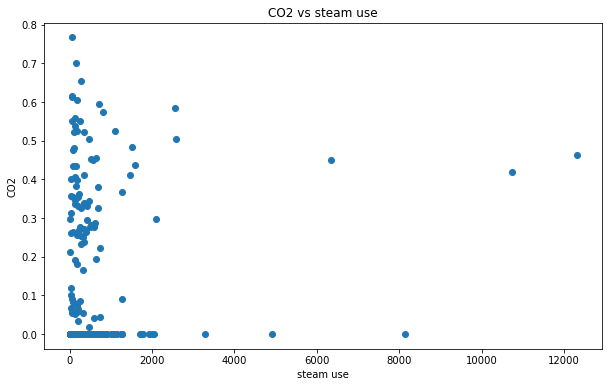

In [191]:
plt.figure(figsize = (10,6))
plt.scatter(data['TotalGHGEmissions'], data['perc-steam_use'])
plt.xlabel('steam use')
plt.ylabel('CO2')
plt.title('CO2 vs steam use')

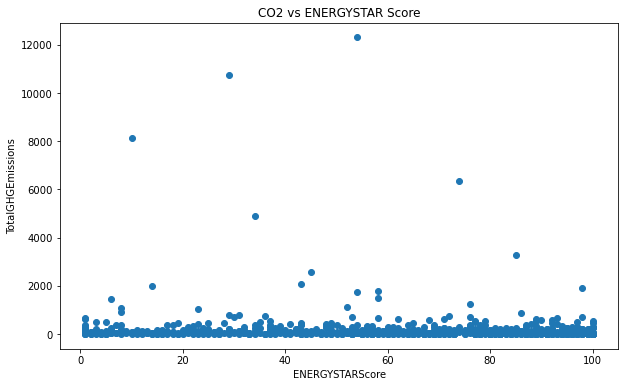

In [192]:
plt.figure(figsize = (10,6))
plt.scatter(data['ENERGYSTARScore'], data['TotalGHGEmissions'])
plt.xlabel('ENERGYSTARScore')
plt.ylabel('TotalGHGEmissions')
plt.title('CO2 vs ENERGYSTAR Score')

# Afficher le scatter plot
plt.show()

Text(0.5, 1.0, 'elec vs ENERGYSTAR Score')

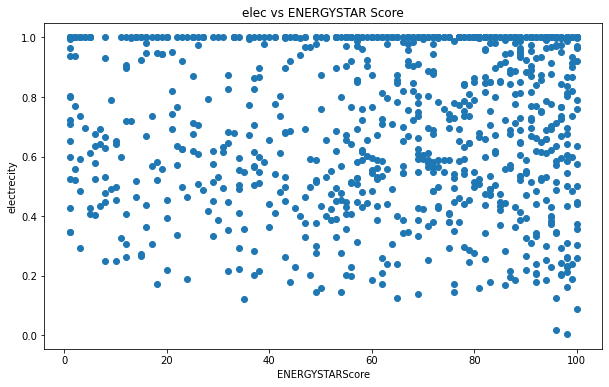

In [193]:
plt.figure(figsize = (10,6))
plt.scatter(data['ENERGYSTARScore'], data['perc-elec_use'])
plt.xlabel('ENERGYSTARScore')
plt.ylabel('electrecity')
plt.title('elec vs ENERGYSTAR Score')

Text(0.5, 1.0, 'gaz vs ENERGYSTAR Score')

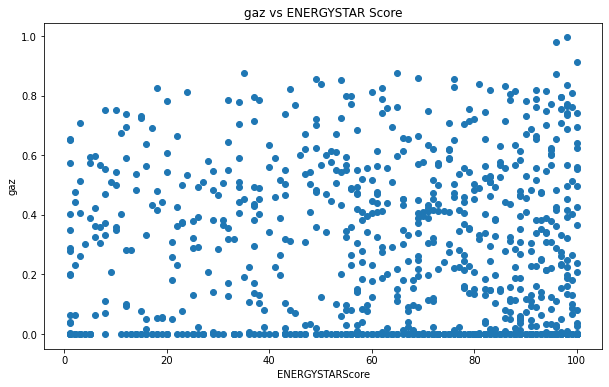

In [194]:
plt.figure(figsize = (10,6))
plt.scatter(data['ENERGYSTARScore'], data['perc-gaz_use'])
plt.xlabel('ENERGYSTARScore')
plt.ylabel('gaz')
plt.title('gaz vs ENERGYSTAR Score')

In [44]:
data.isnull().sum()

PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        687
SecondLargestPropertyUseTypeGFA     687
ThirdLargestPropertyUseType        1174
ThirdLargestPropertyUseTypeGFA     1174
ENERGYSTARScore                     487
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kWh)                      0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
steam_elec_gaz                        0
perc-elec_use                         0


### Supprimmer les valeurs nulles de energy star

In [159]:
df_new = data.dropna(subset= 'ENERGYSTARScore')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              922 non-null    object 
 1   Neighborhood                     922 non-null    object 
 2   YearBuilt                        922 non-null    int64  
 3   NumberofFloors                   922 non-null    int64  
 4   PropertyGFATotal                 922 non-null    int64  
 5   PropertyGFAParking               922 non-null    int64  
 6   PropertyGFABuilding(s)           922 non-null    int64  
 7   LargestPropertyUseType           920 non-null    object 
 8   LargestPropertyUseTypeGFA        920 non-null    float64
 9   SecondLargestPropertyUseType     424 non-null    object 
 10  SecondLargestPropertyUseTypeGFA  424 non-null    float64
 11  ThirdLargestPropertyUseType      91 non-null     object 
 12  ThirdLargestPropertyU

In [160]:
df_new.isnull().sum()

PrimaryPropertyType                  0
Neighborhood                         0
YearBuilt                            0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               2
LargestPropertyUseTypeGFA            2
SecondLargestPropertyUseType       498
SecondLargestPropertyUseTypeGFA    498
ThirdLargestPropertyUseType        831
ThirdLargestPropertyUseTypeGFA     831
ENERGYSTARScore                      0
SiteEUI(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)                   0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                0
SteamUse(kBtu)                       0
Electricity(kWh)                     0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
steam_elec_gaz                       0
perc-elec_use                        0
perc-gaz_use             

## Selectionner les features et les target

In [161]:
features = df_new[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use','ENERGYSTARScore']]

In [162]:
target = df_new[['TotalGHGEmissions']]

In [163]:
features.isnull().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
perc-elec_use             0
perc-gaz_use              0
perc-steam_use            0
ENERGYSTARScore           0
dtype: int64

In [164]:
target.isnull().sum()

TotalGHGEmissions    0
dtype: int64

In [165]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PropertyGFAParking      922 non-null    int64  
 1   PropertyGFABuilding(s)  922 non-null    int64  
 2   PrimaryPropertyType     922 non-null    object 
 3   NumberofFloors          922 non-null    int64  
 4   YearBuilt               922 non-null    int64  
 5   Neighborhood            922 non-null    object 
 6   perc-elec_use           922 non-null    float64
 7   perc-gaz_use            922 non-null    float64
 8   perc-steam_use          922 non-null    float64
 9   ENERGYSTARScore         922 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 79.2+ KB


## Observer la correlation

<AxesSubplot:>

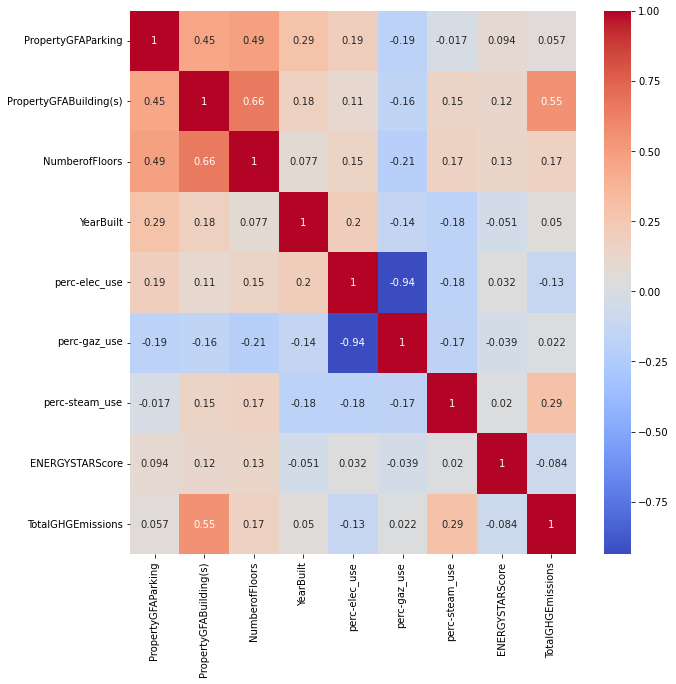

In [166]:
# Calculer la matrice de corrélation
correlation_matrix =  df_new[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use','ENERGYSTARScore',
                                'TotalGHGEmissions']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 10))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

La variable la plus corrélée avec la target est la surface du building et en deuxieme le pourcentage steam

# . Lasso sans le Log sur les target

In [167]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors',
                        'perc-elec_use','perc-gaz_use','perc-steam_use','ENERGYSTARScore']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [205]:
model =Lasso()


In [391]:
alpha = arange(0, 30,0.5)

In [207]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha': alpha   # Liste des valeurs d'alpha 

}


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 20940574.69490142, tolerance: 23758.99663391229
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 11715479.399046317, tolerance: 12600.987421071786
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 15236386.787979979, tolerance: 23424.588609200953
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Objective did not converge. You might want to increase the number of iterations. Duality gap: 15376543.285516888, tolerance: 15454.67808140930

cv R-squared 0.3338722165890953
mean_score_time 0.016730690002441408
mean_fit_time 0.03112936019897461
Mean Squared Error: 372455.6056336258
R-squared: 0.6553756716637654


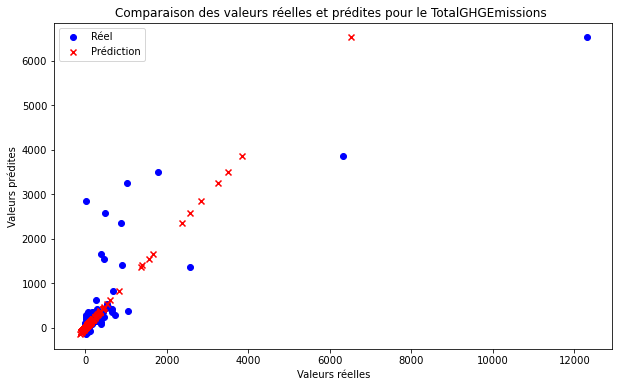

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [208]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [209]:
model= Lasso(alpha= 10.5)

Train Mean Squared Error: 90187.2378224814
Train R-squared: 0.7240727813348711
Test Mean Squared Error: 372455.6056336258
Test R-squared: 0.6553756716637654


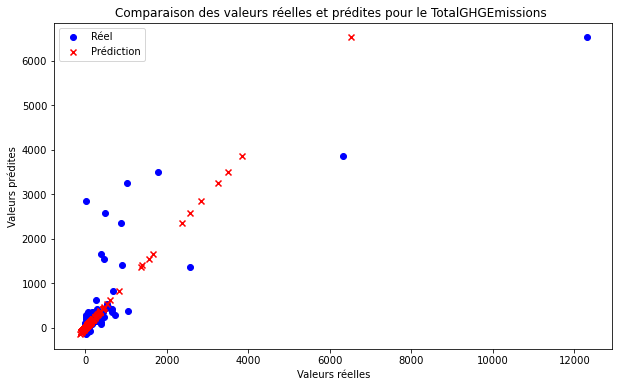

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [210]:
preprocess_and_train_model(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42)

Nous observons une  amelioration sur le model Lasso aprés l'ajout de la variable energy Star score


# . Ridge sans le log de la target

In [215]:
param_grid={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.022552055163333938
mean_score_time 0.01271042823791504
mean_fit_time 0.03130984306335449
Mean Squared Error: 376964.21407501335
R-squared: 0.6512039633249931


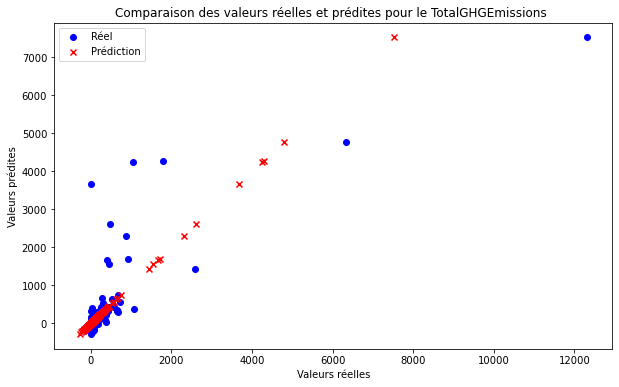

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [216]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [217]:
model = Ridge(alpha=1.5)

Train Mean Squared Error: 69307.92361354336
Train R-squared: 0.7879528960429797
Test Mean Squared Error: 363959.5503687071
Test R-squared: 0.6632368698707278


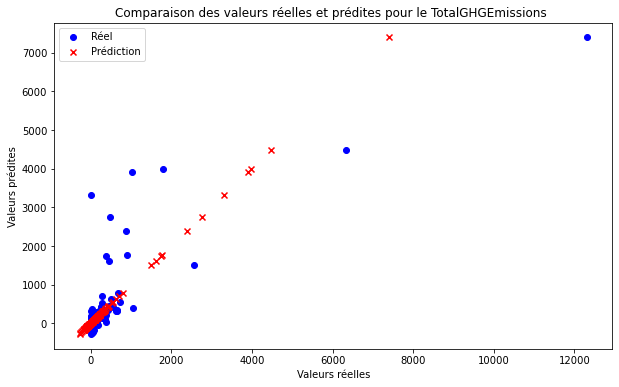

In [218]:
trained = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Nous observons toujours une amélioration 

## Features importance globale avec Shap

# 1.

151
144


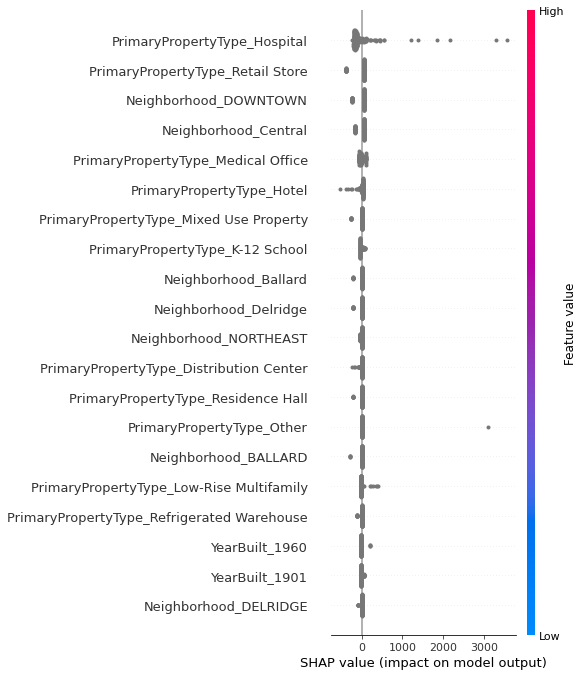

In [134]:
def plot_feature_importance_shap(pipeline, X):
    # Obtenir le transformateur de prétraitement et le modèle du pipeline
    transformateurs, model = pipeline.named_steps["preprocess"], pipeline.named_steps["model"]
    
    # Obtenir les noms des colonnes après encodage en utilisant le ColumnTransformer
    encoded_column_names = transformateurs.transformers_[1][1].get_feature_names_out(input_features=columns_to_encode)
    
    # Transformer les données d'entrée en données encodées
    transformed_X = transformateurs.transform(X)
    print(transformed_X.shape[1])
    print(len(encoded_column_names))
    # Créer un objet explainer SHAP
    explainer = shap.Explainer(model, transformed_X)
    
    # Calculer les valeurs SHAP
    shap_values = explainer(transformed_X)
    
    # Résumer les valeurs SHAP
    shap.summary_plot(shap_values, feature_names=encoded_column_names)
    plt.show()



# Assurez-vous que X_test est défini dans votre environnement
# Appeler la nouvelle fonction pour afficher les importances des caractéristiques avec SHAP
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

plot_feature_importance_shap(trained, X_test)


# 2.

In [135]:
def plot_global_feature_importance_shap_two(pipeline, X_train):
    # Obtenir le transformateur de prétraitement et le modèle du pipeline
    transformateurs, model = pipeline.named_steps["preprocess"], pipeline.named_steps["model"]
    
    # Obtenir les noms des colonnes après encodage en utilisant le ColumnTransformer
    encoded_column_names = transformateurs.transformers_[1][1].get_feature_names_out(input_features=columns_to_encode)
    
    # Transformer les données d'entrée en données encodées
    transformed_X_train = transformateurs.transform(X_train)
    
    # Créer un objet explainer SHAP
    explainer = shap.Explainer(model, transformed_X_train)
    
    # Calculer les valeurs SHAP pour un exemple spécifique
    shap_values = explainer.shap_values(transformed_X_train)
    
    # Résumer les valeurs SHAP pour l'exemple spécifique
    shap.summary_plot(shap_values, feature_names=encoded_column_names, plot_type="bar")
    plt.show()

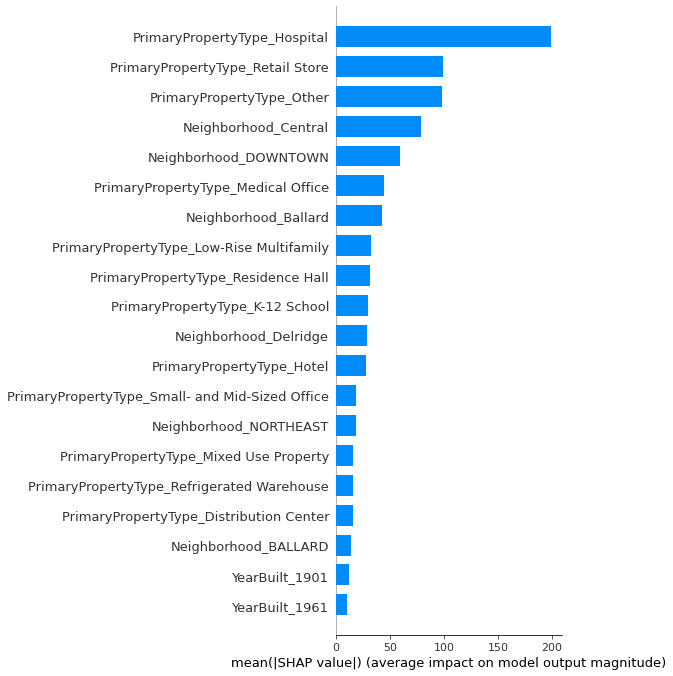

In [136]:
plot_global_feature_importance_shap_two(trained, X_train)

# .Decision tree regressor avec le log de la  target

In [53]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [54]:
param_grid = {
    'model__regressor__max_depth': [None, 10, 20, 30],  
    'model__regressor__min_samples_split': [2, 5, 7, 10]
}

cv R-squared 0.3798968509599484
mean_score_time 0.011668062210083008
mean_fit_time 0.0516322135925293
Mean Squared Error: 89147.31801351375
R-squared: 0.917514103348992


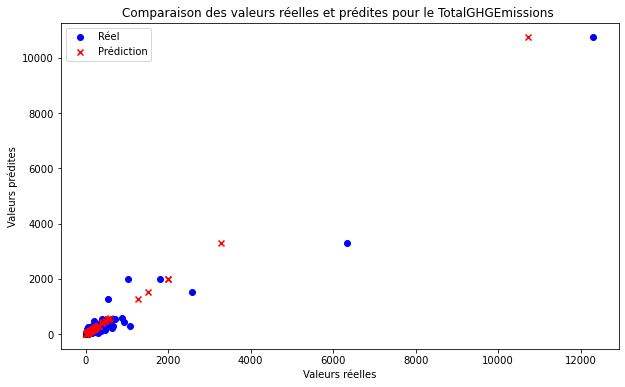

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [55]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [56]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(max_depth = 30, min_samples_split =10), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 78030.70061815598
Train R-squared: 0.7612656212574231
Test Mean Squared Error: 460176.55594713066
Test R-squared: 0.5742095591780132


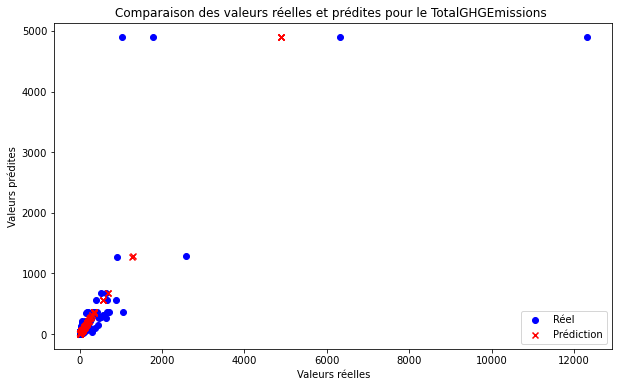

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [57]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Le modele fait de l'overfitting

# Decision tree regressor sans le log de la target

In [58]:
# defenir le model avec la methode log
model = DecisionTreeRegressor()

In [59]:
param_grid = {
    'model__max_depth': [None, 10, 20, 30],  # Hyperparameter for DecisionTreeRegressor
    'model__min_samples_split': [2,4,7],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared -0.029102617714411715
mean_score_time 0.017533016204833985
mean_fit_time 0.03797016143798828
Mean Squared Error: 643487.3719348357
R-squared: 0.4045964136621639


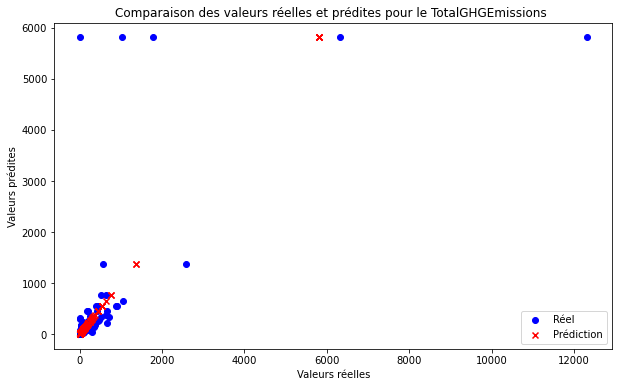

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [60]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [61]:
# defenir le model avec la methode log
model =DecisionTreeRegressor(max_depth=20, min_samples_split=7)


Train Mean Squared Error: 72046.68607406678
Train R-squared: 0.7795736715921304
Test Mean Squared Error: 656912.2207075193
Test R-squared: 0.39217471985135155


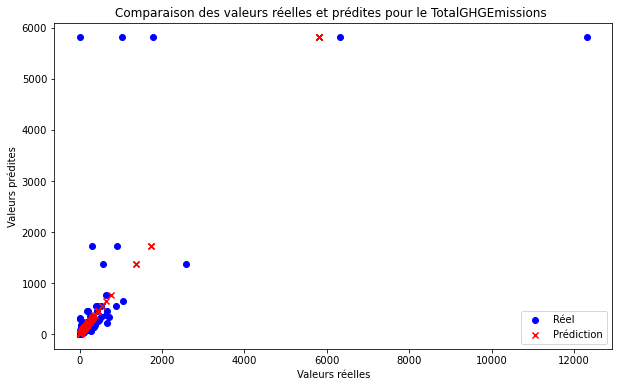

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [62]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Le decision tree fait de l'overfitting ave ou sans la methode log

#  Random forest regressor avec la methode log de la taget

In [168]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [169]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10, 50,100],
    'model__regressor__max_depth': [None, 10,20],
    'model__regressor__min_samples_split': [2, 5],
    'model__regressor__min_samples_leaf': [1, 2, 3]
}


cv R-squared 0.6805741921001764
mean_score_time 0.017025041580200195
mean_fit_time 0.15663533210754393
Mean Squared Error: 422474.42760391365
R-squared: 0.6090944433376266


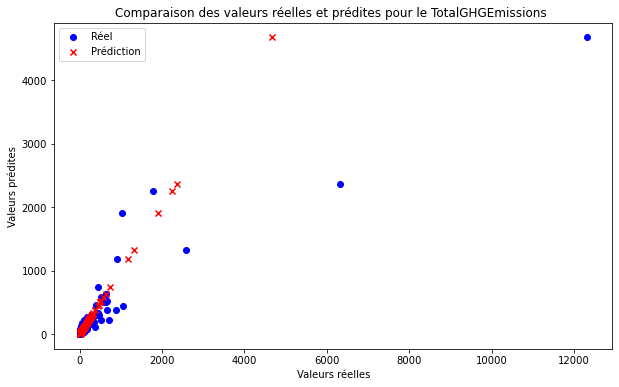

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [170]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [171]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=10), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 60057.980577077855
Train R-squared: 0.8162530315886165
Test Mean Squared Error: 344052.35623782733
Test R-squared: 0.6816565239251816


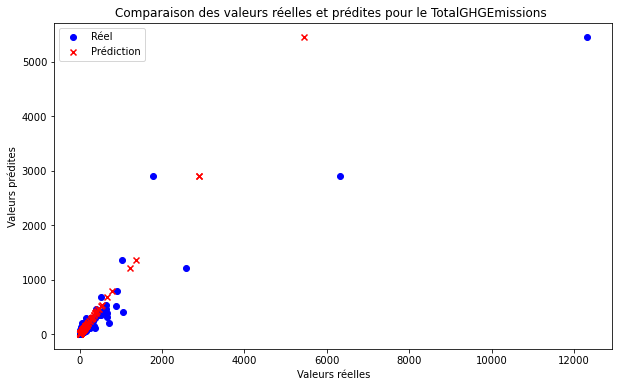

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [172]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

# Les colonnes superficies 

In [392]:
df_new.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'steam_elec_gaz', 'perc-elec_use', 'perc-gaz_use',
       'perc-steam_use'],
      dtype='object')

In [393]:
df_new[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']].head(10)

,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
0,Hotel,88434.0,NaN,NaN,NaN,NaN
1,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0
2,Hotel,756493.0,NaN,NaN,NaN,NaN
3,Hotel,61320.0,NaN,NaN,NaN,NaN
5,Hotel,81352.0,NaN,NaN,NaN,NaN
7,Hotel,163984.0,NaN,NaN,NaN,NaN
8,Hotel,133884.0,NaN,NaN,NaN,NaN
9,Hotel,336640.0,NaN,NaN,NaN,NaN
10,Hotel,65009.0,NaN,NaN,NaN,NaN
11,Hotel,295511.0,Parking,57600.0,NaN,NaN


In [394]:
df_new['LargestPropertyUseType'].value_counts()

Office                                   355
Non-Refrigerated Warehouse               139
Retail Store                              71
Hotel                                     65
Worship Facility                          61
K-12 School                               45
Distribution Center                       41
Supermarket/Grocery Store                 36
Medical Office                            35
Residence Hall/Dormitory                  19
Senior Care Community                     17
Hospital (General Medical & Surgical)     10
Refrigerated Warehouse                     5
Parking                                    4
Bank Branch                                4
Financial Office                           4
Multifamily Housing                        3
Data Center                                3
Courthouse                                 1
Wholesale Club/Supercenter                 1
Other                                      1
Name: LargestPropertyUseType, dtype: int64

###  Créez un (set) de PropertyUseType uniques à partir de toutes les colonnes

In [395]:
# Créez un ensemble (set) de PropertyUseType uniques à partir de toutes les colonnes
all_property_types = set(df_new['LargestPropertyUseType'].unique()).union(
                    set(df_new['SecondLargestPropertyUseType'].unique())).union(
                    set(df_new['ThirdLargestPropertyUseType'].unique()))

In [396]:
all_property_types

{'Bank Branch',
 'College/University',
 'Convenience Store without Gas Station',
 'Courthouse',
 'Data Center',
 'Distribution Center',
 'Financial Office',
 'Fitness Center/Health Club/Gym',
 'Food Service',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Multifamily Housing',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Recreation',
 'Other - Restaurant/Bar',
 'Other - Services',
 'Other - Technology/Science',
 'Parking',
 'Performing Arts',
 'Pre-school/Daycare',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Social/Meeting Hall',
 'Supermarket/Grocery Store',
 'Swimming Pool',
 'Wholesale Club/Supercenter',
 'Worship Facility',
 nan}

## Creer des nouvelles colonnes avec les valeurs des variables proprety use type

In [397]:
# observer la valeur total de la surface avant de faire la division pour calculer le pourcentage, car si cette variable contient zero cela donne
df_new['PropertyGFATotal'].describe()

count    9.220000e+02
mean     1.159316e+05
std      1.898070e+05
min      1.630000e+04
25%      3.038325e+04
50%      5.113400e+04
75%      1.123970e+05
max      1.952220e+06
Name: PropertyGFATotal, dtype: float64

Observer la valeur total de la surface avant de faire la division pour calculer le pourcentage, car si cette variable contient zero cela provoquerai des erreurs de code


In [398]:
def encode_proprety_use_type(row,property_type):

    if str(row['LargestPropertyUseType']) == property_type :
         return row['LargestPropertyUseTypeGFA']
    else : 
        if str(row['SecondLargestPropertyUseType']) == property_type :
            return row['SecondLargestPropertyUseTypeGFA']
        else :
            if str(row['ThirdLargestPropertyUseType']) == property_type :
                return row['ThirdLargestPropertyUseTypeGFA']
            else:
                return 0.0

In [399]:
# Parcourez chaque PropertyUseType unique et créez une colonne correspondante
for property_type in all_property_types:
    # Créez une nouvelle colonne avec le nom de PropertyUseType
    new_column_name = str(property_type) + '_GFA'
    # Utilisez .apply() pour remplir la colonne avec les valeurs de PropertyUseTypeGFA
    df_new[new_column_name] = df_new.apply(encode_proprety_use_type, axis = 1, property_type = property_type)
       # Diviser la valeur de la nouvelle colonne par 'totalGFA'
    df_new[new_column_name] = df_new[new_column_name] / df_new['PropertyGFATotal']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [400]:
df_new.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use,nan_GFA,Supermarket/Grocery Store_GFA,Other - Education_GFA,Food Service_GFA,Bank Branch_GFA,Other - Recreation_GFA,Restaurant_GFA,Other - Entertainment/Public Assembly_GFA,Distribution Center_GFA,Other - Services_GFA,Wholesale Club/Supercenter_GFA,Swimming Pool_GFA,Non-Refrigerated Warehouse_GFA,K-12 School_GFA,College/University_GFA,Multifamily Housing_GFA,Parking_GFA,Senior Care Community_GFA,Manufacturing/Industrial Plant_GFA,Hospital (General Medical & Surgical)_GFA,Other_GFA,Worship Facility_GFA,Courthouse_GFA,Data Center_GFA,Convenience Store without Gas Station_GFA,Medical Office_GFA,Performing Arts_GFA,Hotel_GFA,Other - Restaurant/Bar_GFA,Self-Storage Facility_GFA,Financial Office_GFA,Refrigerated Warehouse_GFA,Residence Hall/Dormitory_GFA,Pre-school/Daycare_GFA,Other - Technology/Science_GFA,Fitness Center/Health Club/Gym_GFA,Office_GFA,Retail Store_GFA,Social/Meeting Hall_GFA,Laboratory_GFA
count,922.000000,922.000000,9.220000e+02,922.000000,9.220000e+02,9.200000e+02,424.000000,91.000000,922.000000,922.000000,922.000000,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,922.000000,9.220000e+02,922.000000,922.000000,922.000000,922.0,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.0,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,1962.261388,4.658351,1.159316e+05,14247.558568,1.016841e+05,9.499743e+04,36800.522870,18537.450549,63.052061,68.295553,70.982321,7.725423e+06,7.904348e+06,5.973503e+05,1.615053e+06,5.510561e+06,1.595918e+06,169.283688,7.703829e+06,0.717330,0.260347,0.022323,0.0,0.037299,0.000162,0.000148,0.004355,0.000116,0.001557,0.000453,0.043726,0.000388,0.001085,0.0,0.151624,0.050053,0.000083,0.002853,0.056460,0.017688,0.000228,0.013413,0.003495,0.067534,0.001078,0.002942,0.000009,0.031324,0.000133,0.064659,0.000261,0.000187,0.003831,0.005506,0.020626,0.000039,0.000052,0.000157,0.335565,0.079159,0.000085,0.000551
std,31.846606,7.380123,1.898070e+05,43910.511484,1.659753e+05,1.518252e+05,62073.021083,40876.043252,28.951183,71.442464,72.076942,2.167346e+07,2.188268e+07,6.657025e+06,4.317656e+06,1.473184e+07,6.233504e+06,692.888825,2.165499e+07,0.266420,0.266005,0.094366,0.0,0.182264,0.004919,0.002652,0.051431,0.002852,0.013717,0.009729,0.226280,0.008511,0.032933,0.0,0.397027,0.222777,0.002529,0.039997,0.124306,0.130989,0.006914,0.142623,0.031640,0.254430,0.032738,0.043962,0.000282,0.165605,0.004026,0.235215,0.005908,0.005670,0.055416,0.073372,0.144471,0.000838,0.001137,0.002962,0.408213,0.249324,0.002585,0.010461
min,1900.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,8.061000e+03,0.000000,0.000000,1.000000,2.100000,2.100000,7.971180e+04,7.996790e+04,0.000000e+00,1.798900e+03,6.138000e+03,0.000000e+00,0.810000,7.971200e+04,0.004455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1931.000000,1.000000,3.038325e+04,0.000000,2.911650e+04,2.716825e+04,6540.750000,4811.000000,43.000000,33.750001,36.025000,1.229609e+06,1.326652e+06,0.00000

### Observer si les resultas sont coherents

In [401]:
float_columns = df_new.select_dtypes(include=['float64'])
for column in float_columns.columns:
    print(f"Max value in {column}: {float_columns[column].max()}")

Max value in LargestPropertyUseTypeGFA: 1680937.0
Max value in SecondLargestPropertyUseTypeGFA: 441551.0
Max value in ThirdLargestPropertyUseTypeGFA: 303910.0
Max value in ENERGYSTARScore: 100.0
Max value in SiteEUI(kBtu/sf): 834.4000244
Max value in SiteEUIWN(kBtu/sf): 834.4000244
Max value in SiteEnergyUse(kBtu): 293090784.0
Max value in SiteEnergyUseWN(kBtu): 296671744.0
Max value in SteamUse(kBtu): 134943456.0
Max value in Electricity(kWh): 80460872.0
Max value in Electricity(kBtu): 274532495.0
Max value in NaturalGas(kBtu): 138191238.0
Max value in TotalGHGEmissions: 12307.16
Max value in steam_elec_gaz: 293090763.0
Max value in perc-elec_use: 1.0
Max value in perc-gaz_use: 0.9955445124115598
Max value in perc-steam_use: 0.7017543346558975
Max value in nan_GFA: 0.0
Max value in Supermarket/Grocery Store_GFA: 1.082129963898917
Max value in Other - Education_GFA: 0.14935114358564525
Max value in Food Service_GFA: 0.05471092140647911
Max value in Bank Branch_GFA: 0.8962191358024691
M

## Supprimer les valeurs supérieur à 1

In [402]:
df_new.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'steam_elec_gaz', 'perc-elec_use', 'perc-gaz_use',
       'perc-steam_use', 'nan_GFA', 'Supermarket/Grocery Store_GFA',
       'Other - Education_GFA', 'Food Service_GFA', 'Bank Branch_GFA',
       'Other - Recreation_GFA', 'Restaurant_GFA',
       'Other - Entertainment/Public Assembly_GFA', 'Distribution Center_GFA',
       'Other - Services_GFA', 'Wholesale Club/Supercenter_GFA',
       'Swimming 

In [403]:
# Récupérez toutes les colonnes se terminant par "_GFA"
cols = [col for col in df_new.columns if col.endswith('_GFA')]

In [404]:
cols

['nan_GFA',
 'Supermarket/Grocery Store_GFA',
 'Other - Education_GFA',
 'Food Service_GFA',
 'Bank Branch_GFA',
 'Other - Recreation_GFA',
 'Restaurant_GFA',
 'Other - Entertainment/Public Assembly_GFA',
 'Distribution Center_GFA',
 'Other - Services_GFA',
 'Wholesale Club/Supercenter_GFA',
 'Swimming Pool_GFA',
 'Non-Refrigerated Warehouse_GFA',
 'K-12 School_GFA',
 'College/University_GFA',
 'Multifamily Housing_GFA',
 'Parking_GFA',
 'Senior Care Community_GFA',
 'Manufacturing/Industrial Plant_GFA',
 'Hospital (General Medical & Surgical)_GFA',
 'Other_GFA',
 'Worship Facility_GFA',
 'Courthouse_GFA',
 'Data Center_GFA',
 'Convenience Store without Gas Station_GFA',
 'Medical Office_GFA',
 'Performing Arts_GFA',
 'Hotel_GFA',
 'Other - Restaurant/Bar_GFA',
 'Self-Storage Facility_GFA',
 'Financial Office_GFA',
 'Refrigerated Warehouse_GFA',
 'Residence Hall/Dormitory_GFA',
 'Pre-school/Daycare_GFA',
 'Other - Technology/Science_GFA',
 'Fitness Center/Health Club/Gym_GFA',
 'Office

In [405]:
# Appliquer le filtrage pour ces colonnes
for col in cols:
    df_new = df_new[df_new[col] <= 1]

In [406]:
for column in df_new[cols]:
    print(f"Max value in {column}: {df_new[cols][column].max()}")

Max value in nan_GFA: 0.0
Max value in Supermarket/Grocery Store_GFA: 1.0
Max value in Other - Education_GFA: 0.14935114358564525
Max value in Food Service_GFA: 0.05471092140647911
Max value in Bank Branch_GFA: 0.8962191358024691
Max value in Other - Recreation_GFA: 0.08335367937887592
Max value in Restaurant_GFA: 0.24545454545454545
Max value in Other - Entertainment/Public Assembly_GFA: 0.21537334093314878
Max value in Distribution Center_GFA: 1.0
Max value in Other - Services_GFA: 0.21686060224860446
Max value in Wholesale Club/Supercenter_GFA: 1.0
Max value in Swimming Pool_GFA: 0.0
Max value in Non-Refrigerated Warehouse_GFA: 1.0
Max value in K-12 School_GFA: 1.0
Max value in College/University_GFA: 0.07678912962804373
Max value in Multifamily Housing_GFA: 0.9783517227301539
Max value in Parking_GFA: 0.8824308027178869
Max value in Senior Care Community_GFA: 1.0
Max value in Manufacturing/Industrial Plant_GFA: 0.20992470289394902
Max value in Hospital (General Medical & Surgical)_

### Supprimer les colonnes surface qu'avec des valeurs nulles

In [407]:
# Sélectionnez les colonnes qui contiennent uniquement des zéros et les supprimmer
cols_only_zeros = [col for col in cols if df_new[col].sum() == 0]


In [408]:
df_new = df_new.drop(cols_only_zeros, axis = 1)

In [409]:
# Récupérez toutes les colonnes se terminant par "_GFA"
cols = [col for col in df_new.columns if col.endswith('_GFA')]

In [410]:
cols

['Supermarket/Grocery Store_GFA',
 'Other - Education_GFA',
 'Food Service_GFA',
 'Bank Branch_GFA',
 'Other - Recreation_GFA',
 'Restaurant_GFA',
 'Other - Entertainment/Public Assembly_GFA',
 'Distribution Center_GFA',
 'Other - Services_GFA',
 'Wholesale Club/Supercenter_GFA',
 'Non-Refrigerated Warehouse_GFA',
 'K-12 School_GFA',
 'College/University_GFA',
 'Multifamily Housing_GFA',
 'Parking_GFA',
 'Senior Care Community_GFA',
 'Manufacturing/Industrial Plant_GFA',
 'Hospital (General Medical & Surgical)_GFA',
 'Other_GFA',
 'Worship Facility_GFA',
 'Courthouse_GFA',
 'Data Center_GFA',
 'Convenience Store without Gas Station_GFA',
 'Medical Office_GFA',
 'Performing Arts_GFA',
 'Hotel_GFA',
 'Other - Restaurant/Bar_GFA',
 'Self-Storage Facility_GFA',
 'Financial Office_GFA',
 'Refrigerated Warehouse_GFA',
 'Residence Hall/Dormitory_GFA',
 'Pre-school/Daycare_GFA',
 'Other - Technology/Science_GFA',
 'Fitness Center/Health Club/Gym_GFA',
 'Office_GFA',
 'Retail Store_GFA',
 'Soci

In [411]:
df_new.shape

(810, 65)

In [412]:
df_new.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use,Supermarket/Grocery Store_GFA,Other - Education_GFA,Food Service_GFA,Bank Branch_GFA,Other - Recreation_GFA,Restaurant_GFA,Other - Entertainment/Public Assembly_GFA,Distribution Center_GFA,Other - Services_GFA,Wholesale Club/Supercenter_GFA,Non-Refrigerated Warehouse_GFA,K-12 School_GFA,College/University_GFA,Multifamily Housing_GFA,Parking_GFA,Senior Care Community_GFA,Manufacturing/Industrial Plant_GFA,Hospital (General Medical & Surgical)_GFA,Other_GFA,Worship Facility_GFA,Courthouse_GFA,Data Center_GFA,Convenience Store without Gas Station_GFA,Medical Office_GFA,Performing Arts_GFA,Hotel_GFA,Other - Restaurant/Bar_GFA,Self-Storage Facility_GFA,Financial Office_GFA,Refrigerated Warehouse_GFA,Residence Hall/Dormitory_GFA,Pre-school/Daycare_GFA,Other - Technology/Science_GFA,Fitness Center/Health Club/Gym_GFA,Office_GFA,Retail Store_GFA,Social/Meeting Hall_GFA,Laboratory_GFA
count,810.000000,810.000000,8.100000e+02,810.000000,8.100000e+02,8.080000e+02,390.000000,91.000000,810.000000,810.000000,810.000000,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,810.000000,8.100000e+02,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1961.630864,4.812346,1.185177e+05,15750.837037,1.027669e+05,9.203076e+04,37164.522299,18537.450549,62.925926,67.559012,70.207531,7.157456e+06,7.341938e+06,4.013094e+05,1.572989e+06,5.367037e+06,1.364567e+06,140.864148,7.132914e+06,0.727205,0.251577,0.021218,0.032191,0.000184,0.000168,0.004957,0.000132,0.001624,0.000516,0.036911,0.000442,0.001235,0.142539,0.039253,0.000095,0.003247,0.061007,0.014697,0.000259,0.004041,0.003978,0.061886,0.001227,0.003342,0.000011,0.028931,0.000151,0.062789,0.000081,0.000213,0.004361,0.005030,0.018775,0.000044,0.000059,0.000179,0.353037,0.073368,0.000097,0.000627
std,32.282296,7.653455,1.941141e+05,46006.133622,1.678665e+05,1.458254e+05,59999.175798,40876.043252,29.026938,70.606714,71.185942,1.891167e+07,1.910537e+07,4.998919e+06,4.099111e+06,1.398617e+07,5.383435e+06,555.208012,1.888681e+07,0.265708,0.264613,0.091497,0.166362,0.005248,0.002829,0.054848,0.003043,0.014216,0.010379,0.175449,0.009080,0.035136,0.330004,0.189078,0.002698,0.042661,0.126543,0.116477,0.007376,0.058411,0.033731,0.237378,0.034928,0.046892,0.000301,0.148876,0.004295,0.227763,0.001333,0.006050,0.059108,0.069983,0.133228,0.000894,0.001213,0.003159,0.401684,0.230764,0.002758,0.011160
min,1900.000000,0.000000,2.000000e+04,0.000000,1.620000e+04,8.061000e+03,0.000000,0.000000,1.000000,2.100000,2.100000,7.971180e+04,7.996790e+04,0.000000e+00,1.798900e+03,6.138000e+03,0.000000e+00,0.810000,7.971200e+04,0.004455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,1.000000,3.084375e+04,0.000000,2.964475e+04,2.628025e+04,7035.000000,4811.000000,43.250000,34.200001,36.374999,1.220944e+06,1.306668e+06,0.000000e+00,2.232217e+05,7.616325e+05,0.000000e+00,19.640000,1.22094

In [413]:
# Récupérez toutes les colonnes se terminant par "_GFA"
cols_gfa = [col for col in df_new.columns if col.endswith('_GFA')]

In [414]:
# Récupérez toutes les colonnes se terminant par "_GFA"
cols_gfa = [col for col in df_new.columns if col.endswith('_GFA')]

In [415]:
all_cols = list(features.columns) + cols_gfa

In [416]:
df_new.shape

(810, 65)

In [417]:
features = df_new[all_cols]

In [418]:
features.head()

,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use,ENERGYSTARScore,Supermarket/Grocery Store_GFA,Other - Education_GFA,Food Service_GFA,Bank Branch_GFA,Other - Recreation_GFA,Restaurant_GFA,Other - Entertainment/Public Assembly_GFA,Distribution Center_GFA,Other - Services_GFA,Wholesale Club/Supercenter_GFA,Non-Refrigerated Warehouse_GFA,K-12 School_GFA,College/University_GFA,Multifamily Housing_GFA,Parking_GFA,Senior Care Community_GFA,Manufacturing/Industrial Plant_GFA,Hospital (General Medical & Surgical)_GFA,Other_GFA,Worship Facility_GFA,Courthouse_GFA,Data Center_GFA,Convenience Store without Gas Station_GFA,Medical Office_GFA,Performing Arts_GFA,Hotel_GFA,Other - Restaurant/Bar_GFA,Self-Storage Facility_GFA,Financial Office_GFA,Refrigerated Warehouse_GFA,Residence Hall/Dormitory_GFA,Pre-school/Daycare_GFA,Other - Technology/Science_GFA,Fitness Center/Health Club/Gym_GFA,Office_GFA,Retail Store_GFA,Social/Meeting Hall_GFA,Laboratory_GFA
0,0,88434,Hotel,12,1927,DOWNTOWN,0.546060,0.176638,0.277302,60.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,Hotel,11,1996,DOWNTOWN,0.386609,0.613391,0.000000,61.0,0.0,0.0,0.0,0.0,0.0,0.044629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.809918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,Hotel,41,1969,DOWNTOWN,0.682307,0.020579,0.297113,43.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,Hotel,10,1926,DOWNTOWN,0.407519,0.266567,0.325913,56.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,83008,Hotel,11,1926,DOWNTOWN,0.488160,0.511840,0.000000,27.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
features.describe()

,PropertyGFAParking,PropertyGFABuilding(s),NumberofFloors,YearBuilt,perc-elec_use,perc-gaz_use,perc-steam_use,ENERGYSTARScore,Supermarket/Grocery Store_GFA,Other - Education_GFA,Food Service_GFA,Bank Branch_GFA,Other - Recreation_GFA,Restaurant_GFA,Other - Entertainment/Public Assembly_GFA,Distribution Center_GFA,Other - Services_GFA,Wholesale Club/Supercenter_GFA,Non-Refrigerated Warehouse_GFA,K-12 School_GFA,College/University_GFA,Multifamily Housing_GFA,Parking_GFA,Senior Care Community_GFA,Manufacturing/Industrial Plant_GFA,Hospital (General Medical & Surgical)_GFA,Other_GFA,Worship Facility_GFA,Courthouse_GFA,Data Center_GFA,Convenience Store without Gas Station_GFA,Medical Office_GFA,Performing Arts_GFA,Hotel_GFA,Other - Restaurant/Bar_GFA,Self-Storage Facility_GFA,Financial Office_GFA,Refrigerated Warehouse_GFA,Residence Hall/Dormitory_GFA,Pre-school/Daycare_GFA,Other - Technology/Science_GFA,Fitness Center/Health Club/Gym_GFA,Office_GFA,Retail Store_GFA,Social/Meeting Hall_GFA,Laboratory_GFA
count,810.000000,8.100000e+02,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,15750.837037,1.027669e+05,4.812346,1961.630864,0.727205,0.251577,0.021218,62.925926,0.032191,0.000184,0.000168,0.004957,0.000132,0.001624,0.000516,0.036911,0.000442,0.001235,0.142539,0.039253,0.000095,0.003247,0.061007,0.014697,0.000259,0.004041,0.003978,0.061886,0.001227,0.003342,0.000011,0.028931,0.000151,0.062789,0.000081,0.000213,0.004361,0.005030,0.018775,0.000044,0.000059,0.000179,0.353037,0.073368,0.000097,0.000627
std,46006.133622,1.678665e+05,7.653455,32.282296,0.265708,0.264613,0.091497,29.026938,0.166362,0.005248,0.002829,0.054848,0.003043,0.014216,0.010379,0.175449,0.009080,0.035136,0.330004,0.189078,0.002698,0.042661,0.126543,0.116477,0.007376,0.058411,0.033731,0.237378,0.034928,0.046892,0.000301,0.148876,0.004295,0.227763,0.001333,0.006050,0.059108,0.069983,0.133228,0.000894,0.001213,0.003159,0.401684,0.230764,0.002758,0.011160
min,0.000000,1.620000e+04,0.000000,1900.000000,0.004455,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.964475e+04,1.000000,1930.000000,0.516714,0.000000,0.000000,43.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.016400e+04,3.000000,1967.000000,0.766741,0.174432,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4790.000000,1.027595e+05,5.000000,1987.000000,1.000000,0.465768,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [420]:
target = df_new[['TotalGHGEmissions']]

In [421]:
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [422]:
columns_to_normalize = [item for item in features if item not in columns_to_encode ]

# . Ridge sans le log de la target

In [424]:
alpha = arange(0, 30,0.5)

In [247]:
param={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.1474092607739251
mean_score_time 0.011782169342041016
mean_fit_time 0.03549766540527344
Mean Squared Error: 268325.3371805256
R-squared: 0.7187306626794281


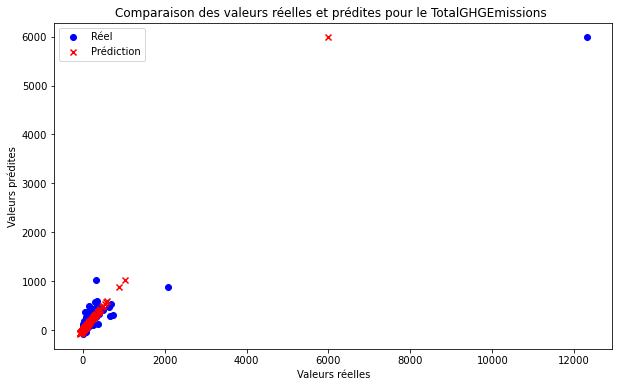

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore',
                                                   'Supermarket/Grocery '
                                                   'Store_GFA',
                                                   'Other - Education_GFA',
                                                   'Food Service_GFA',
                                                   'Bank

In [248]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [249]:
model = Ridge(alpha=29.5)

Train Mean Squared Error: 37114.556750368065
Train R-squared: 0.7452424301908364
Test Mean Squared Error: 268325.3371805256
Test R-squared: 0.7187306626794281


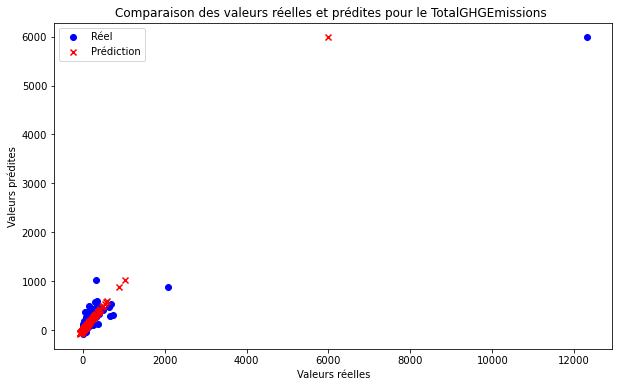

In [250]:
best_trained = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

 # . Lasso sans le Log sur la target

In [251]:
model =Lasso()


In [425]:
alpha = np.arange(0.1, 10, 0.5)

In [253]:
#alpha_lasso = arange(0,30,1.5)

In [254]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha':  alpha  # Liste des valeurs d'alpha 

}


Objective did not converge. You might want to increase the number of iterations. Duality gap: 25939.331762731075, tolerance: 8884.69587097593


cv R-squared 0.20539994827393135
mean_score_time 0.013265228271484375
mean_fit_time 0.2452399730682373
Mean Squared Error: 192111.4489736926
R-squared: 0.798621104841205


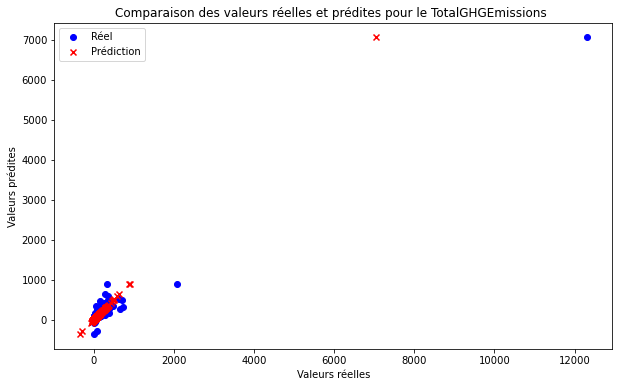

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore',
                                                   'Supermarket/Grocery '
                                                   'Store_GFA',
                                                   'Other - Education_GFA',
                                                   'Food Service_GFA',
                                                   'Bank

In [255]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [256]:
model= Lasso(alpha= 0.6)

Train Mean Squared Error: 17531.1099209706
Train R-squared: 0.8796649252862356
Test Mean Squared Error: 192111.4489736926
Test R-squared: 0.798621104841205


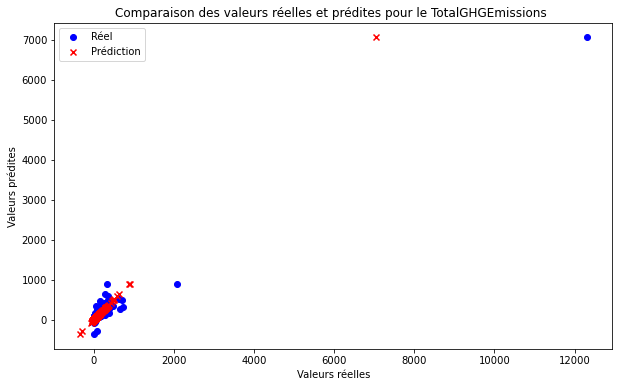

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore',
                                                   'Supermarket/Grocery '
                                                   'Store_GFA',
                                                   'Other - Education_GFA',
                                                   'Food Service_GFA',
                                                   'Bank

In [257]:
preprocess_and_train_model(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42)

# Random forest regressor sans la methode log de la taget

In [180]:
model = RandomForestRegressor()


In [181]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50,100],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}


In [182]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

KeyboardInterrupt: 

## Entrainement du meilleure model

In [ ]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=2,min_samples_split=5,
                                       n_estimators=10)


In [ ]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Le modele a de bon resultat mais fait de l'overfitting:


In [ ]:
find_max_ten_error_values_two(features, target, trained_pipeline)

Nous observons le meme comportement pour les valeurs que le modele a du mal a prédire: sans parking 

# Features importances globale

In [ ]:
def plot_feature_importances(df_feature_importances):
    plt.figure(figsize=(14, 12))
    sns.barplot(x="Importance", y="Feature", data=df_feature_importances)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

In [ ]:
def preprocess_and_train_model_random_forest(features, target, model, columns_to_normalize,columns_to_encode,test_size=0.2, random_state=42):

     #Créer les transformateurs pour la normalisation et l'encodage
    transformateurs =ColumnTransformer ([
    ('normalisation', StandardScaler(), columns_to_normalize),
    ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
    ])

            # Utiliser RandomForestRegressor comme modèle
    model = RandomForestRegressor(random_state=random_state)

    # Créer la pipeline avec le préprocesseur et le modèle
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])


    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    pipeline.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test
    predictions_train = pipeline.predict(X_train)
    predictions_test = pipeline.predict(X_test)
    
    # Get the feature importances from the model
    feature_importances = pipeline.named_steps['model'].feature_importances_
    
    feature_importance_pairs = list(zip(columns_to_normalize + columns_to_encode, feature_importances))

    # Triez la liste par ordre décroissant d'importance
    #sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

    # Affichez les caractéristiques triées par ordre d'importance
    print("Feature Importances:")
    #for feature, importance in sorted_feature_importance_pairs:
        #print(f"{feature}: {importance}")

    # Calculer les métriques pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, predictions_train)
    r2_train = r2_score(y_train, predictions_train)

    # Calculer les métriques pour l'ensemble de test
    mse_test = mean_squared_error(y_test, predictions_test)
    r2_test = r2_score(y_test, predictions_test)
    
    df_feature_importances = pipeline.named_steps['model'].feature_importances_

    # Afficher les métriques pour l'ensemble d'entraînement
    print("Train Mean Squared Error:", mse_train)
    print("Train R-squared:", r2_train)

    # Afficher les métriques pour l'ensemble de test
    print("Test Mean Squared Error:", mse_test)
    print("Test R-squared:", r2_test)
    

    # Appeler la fonction pour afficher la comparaison entre les valeurs réelles et prédites pour l'ensemble de test
    plot_comparison_co2(y_test, predictions_test)
    # Get the feature importances from the model
    feature_importances = pipeline.named_steps['model'].feature_importances_
    feature_importance_pairs = list(zip(columns_to_normalize + columns_to_encode, feature_importances))

    # Convert to DataFrame
    df_feature_importances = pd.DataFrame(feature_importance_pairs, columns=["Feature", "Importance"])
    df_feature_importances = df_feature_importances.sort_values(by="Importance", ascending=False)

    # You can print the DataFrame or save it as needed
    df_feature_importances
    plot_feature_importances(df_feature_importances)



    return pipeline



In [ ]:
preprocess_and_train_model_random_forest(features, target, model, columns_to_normalize,columns_to_encode,test_size=0.2, random_state=42)



# Le modele finale (Ridge)

In [459]:
model = Ridge(alpha=29.5)

Train Mean Squared Error: 37114.556750368065
Train R-squared: 0.7452424301908364
Test Mean Squared Error: 268325.3371805256
Test R-squared: 0.7187306626794281


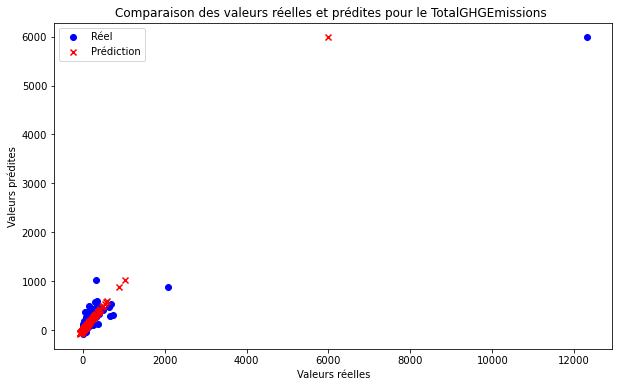

In [460]:
best_trained = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

In [472]:
target.describe()

,TotalGHGEmissions
count,810.000000
mean,140.864148
std,555.208012
min,0.810000
25%,19.640000
50%,47.320000
75%,128.325000
max,12307.160000


# Observer les valeurs mal prédites

In [461]:
find_max_ten_error_values_two(features, target,best_trained )

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use,ENERGYSTARScore,Supermarket/Grocery Store_GFA,Other - Education_GFA,Food Service_GFA,Bank Branch_GFA,Other - Recreation_GFA,Restaurant_GFA,Other - Entertainment/Public Assembly_GFA,Distribution Center_GFA,Other - Services_GFA,Wholesale Club/Supercenter_GFA,Non-Refrigerated Warehouse_GFA,K-12 School_GFA,College/University_GFA,Multifamily Housing_GFA,Parking_GFA,Senior Care Community_GFA,Manufacturing/Industrial Plant_GFA,Hospital (General Medical & Surgical)_GFA,Other_GFA,Worship Facility_GFA,Courthouse_GFA,Data Center_GFA,Convenience Store without Gas Station_GFA,Medical Office_GFA,Performing Arts_GFA,Hotel_GFA,Other - Restaurant/Bar_GFA,Self-Storage Facility_GFA,Financial Office_GFA,Refrigerated Warehouse_GFA,Residence Hall/Dormitory_GFA,Pre-school/Daycare_GFA,Other - Technology/Science_GFA,Fitness Center/Health Club/Gym_GFA,Office_GFA,Retail Store_GFA,Social/Meeting Hall_GFA,Laboratory_GFA
484,0,1765970,Hospital,14,1994,EAST,0.477874,0.059380,0.462746,54.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250033,0.0,0.0,0.928291,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
92,0,879000,Hospital,10,1953,NORTHEAST,0.455581,0.544419,0.000000,10.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
253,150455,201075,Hospital,7,2000,LAKE UNION,0.627069,0.372931,0.000000,23.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.613325,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1350,0,330000,Hospital,8,2013,NORTHEAST,0.479587,0.520413,0.000000,58.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.731818,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
178,0,542305,Hotel,12,1923,DOWNTOWN,0.426273,0.070252,0.503475,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,196718,759392,Hotel,41,1969,DOWNTOWN,0.682307,0.020579,0.297113,43.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.79122,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
433,0,429405,Other,33,1981,DOWNTOWN,0.999455,0.000545,0.000000,98.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.510001,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.490001,0.0,0.0,0.0
375,0,1592914,Large Office,42,2005,DOWNTOWN,0.975664,0.006877,0.017459,97.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218962,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.190789,0.0,0.0,0.0,0.0,0.0,0.574313,0.0,0.0,0.0
193,59280,272787,Hotel,19,1973,DOWNTOWN,0.524024,0.063490,0.412486,6.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
148,0,1323055,Large Office,47,1983,DOWNTOWN,0.996379,0.003621,0.000000,94.0,0.0,0.0,0.0,0.0,0.0,0.028415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206100,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.764243,0.0,0.0,0.0


Le modele a du mal à predire les propriété sans parking

# Features importance globale avec shap


# 1.

In [462]:
def get_feature_names_after_transform(pipeline):
    # Extraction du transformateur de la pipeline
    transformer = pipeline.named_steps['preprocess']

    # Obtenir les noms des features après OneHotEncoding
    ohe_feature_names = transformer.named_transformers_['encodage'].get_feature_names_out()

    # Fusionner les noms des features normalisées avec ceux obtenus après OneHotEncoding
    all_feature_names = list(pipeline.named_steps['preprocess'].transformers_[0][2]) + list(ohe_feature_names)

    return all_feature_names

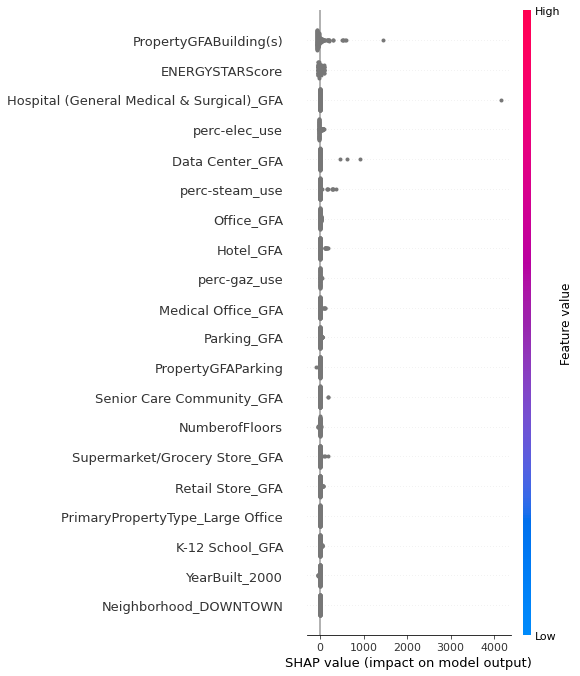

In [463]:
def plot_shap_values(pipeline, X_test_transformed):
    # Extraire le modèle de la pipeline
    model = pipeline.named_steps['model']

    # Obtenir les noms des features
    feature_names = get_feature_names_after_transform(pipeline)
    
    # Créer un explainer SHAP pour le modèle
    explainer = shap.LinearExplainer(model, X_test_transformed)

    # Calculer les valeurs SHAP pour les prédictions de l'ensemble de test
    shap_values = explainer.shap_values(X_test_transformed)

    # Afficher les importances des features avec SHAP et les noms des features
    shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)
plot_shap_values(best_trained,X_test_transformed)

La surface des batiments est la features la plus influentes sur les résultats du modeles 

# Features importance locale

In [464]:
shap.initjs()

In [465]:
# Extraire le préprocesseur et le modèle du pipeline
preprocessor = best_trained.named_steps['preprocess']
model = best_trained.named_steps['model']


In [466]:

# Transformez les données d'entraînement en utilisant le préprocesseur
X_train_transformed = preprocessor.transform(X_train.iloc[:20,:])

# Initialiser l'explainer SHAP pour le modèle Ridge
explainer = shap.KernelExplainer(model.predict, X_train_transformed)

In [467]:
# Récupérer les noms des variables après one-hot encoding
onehot_columns = list(best_trained.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(columns_to_encode))

# Combiner les noms de toutes les colonnes (celles qui ont été normalisées et celles qui ont été encodées)
feature_names = columns_to_normalize + onehot_columns

In [469]:
# Calculer les valeurs SHAP pour un échantillon de vos données
shap_values = explainer.shap_values(X_train_transformed)
shap_values_array = shap_values[0]
# Afficher le diagramme de force SHAP pour une instance spécifique
instance_index = 0  # par exemple, pour le premier échantillon de données
# Convertir la matrice sparse en matrice dense
X_train_transformed_dense = X_train_transformed.toarray()
shap.force_plot(explainer.expected_value, shap_values_array[instance_index,:], X_train_transformed_dense[instance_index, :])


  0%|          | 0/20 [00:00<?, ?it/s]

In [470]:
# Récupérer les noms des variables après one-hot encoding
onehot_columns = list(best_trained.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(columns_to_encode))

# Combiner les noms de toutes les colonnes (celles qui ont été normalisées et celles qui ont été encodées)
feature_names = columns_to_normalize + onehot_columns

In [471]:
shap.force_plot(explainer.expected_value, shap_values_array[instance_index, :], X_train_transformed_dense[instance_index, :], feature_names=feature_names)


Nous observons l'importance locale de la variable Enrgy Star Score sur les resultats du modele 